# Customer Subscribtion Predictive Model

**Background:**

The marketing manager at a major financial institution in Canada want to run a campaign for the new product: bank term deposit. We have access to past campaign results on a similar product and using these data we want to build a predictive model to find customers that is most likely to purchase the new product (i.e. finding which customers we should target in our upcoming campaign).

**Goal:**

Our target is finding whether a customer will subscribe to the term deposit (y/n)

_______________



**Data Dictionary:**<br>

The data contains customer information collected from previous campaigns as well as the result from the last campaign. 

**Client related data:**<br>
1 - age (numeric)<br>
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')<br>
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')<br>
5 - default: has credit in default? (categorical: 'no','yes','unknown')<br>
6 - housing: has housing loan? (categorical: 'no','yes','unknown')<br>
7 - loan: has personal loan? (categorical: 'no','yes','unknown')<br>


**Related with the last contact:**<br>
8 - contact: contact communication type (categorical: 'cellular','telephone')<br>
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br>
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.<br>


**Other attributes:**<br>
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
14 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')<br>


**Social and economic context attributes:**<br>
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)<br>
17 - cons.price.idx: consumer price index - monthly indicator (numeric)<br>
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)<br>
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)<br>
20 - nr.employed: number of employees - quarterly indicator (numeric)<br>

**Output variable (desired target):**<br>
21 - y - has the client subscribed? (binary: 'yes','no')<br>


The dataset has 41,188 records and 21 columns, 19 of which can be considered for use in modelling

_______

**Data Exploration:**

Having a quick glance at the data, we are dealing with a pretty structured and complete dataset.

Immediately looking at the data, i know i want to break age down into groups. there could be other variables we need to change as well and we may discover them as we go.

We also have several several categorical variables where they are "unknown" labels. it will be worth looking at there variables to see the volume of "unkown" values.

I also have some intuition on what might affect a customer subbing or not, throughout my exploration, I will ask try to answer the following:

***Hypothesis to test:***

1. The number of time contacted does not affect outcome. in fact, conversion likely to taper off after a certain threshold because those that would have converted will have convertered already

2. The outcome of previous campaign result affect outcome of future campaign. given campaign offer is selectly diff but within same space. i.e. those that convert for previou campaign is more likely to convert for future campaign.

**Summary of Finding:**

1. Data Quality Issue
- we have a couple volumns with outlier, but after investigation they don't appear to be bad data just odd. I have decided to keep these outliers
- pdays seem to contain invalid values for when poutcome = 'failure'
- on avg, <2% of the categorical data are "unknown"
- however the variable default is very imbalanced with only 3 entry = 'yes'

|default|count|
|-------|-----|
|no|32588|
|yes|3|
|unknown|8597|

2. Who subbed? (i.e. y='y')
- Those contacted in a previous campaign are more likely to sub
    - 88% of those **not** subbed were not contacted in a previous campaign, whereas only 68% of those subbed were not contacted in the previous campaign
- In addition, those that subbed to previous campaign has even high chance of subbing
    - 65% of those where their previous campaign outcome was success also subbed, whereas only 14% and 9% subbed for 'failure' and 'nonexistent' group respectively. this is quite a big difference (hypothesis 2)
- the avg number of contacts for current campaign for those subbed is lower than those that did not sub
- #contact does not increase sub %, in fact as # contact go up, sub % go down (hypothesis 1):
<br>here we can see a clear downward trend
![title](img/NumContact.png)


- those in the age group 25-34 were the most likely to sub, while those in age group 34-44 were the least likely to sub:
![title](img/Age.png)

3. Other interesting finding
- based on the dataset, we know the conversion rate for the previous campaign is ~11%
- the job type with highest sub% are student and retired, lowest being blue-collar and entrepreneur
- those with 'single' marital status have a bit higher sub %, butI suspect this is due to age instead of marital status
- those with 'uni degree' have a bit higher sub %
- loan data probably come from same source because those with housing loan = uknown, personal loan also = unknown

_______

**Feature Engineering:**

1. Create age buckets (age_bucket)
2. Create pdays buckets, this will also deal with pdays = 999 (time_since_previous_contact)
3. Deal with "unknown" categorical variable using one hot encoding and remove "unknown" columns
4. Renaming of columns so it is more intuiative:<br>
   campaign -> num_contact_current<br>
   housing -> housing_loan <br>
   loan -> personal_loan <br>
   contact -> contact_method<br>
   poutcome -> outcome_previous<br>


_______

**Model Selection:**

What we know so far:
- we want classify our data
- the data we have is structured and labelled

Given the knowledge above, the first algorithm we can try is **Logistic Regression** and another one being  **Decision Trees**. As part of this exercise we will fit our data to both models and compare the results.

**Variable Selection:**

I will be excluding the following variables from the data set:

1. duration cannot be used
2. default is imbalanced
3. age will be replaced with age_bucket
4. pdays will be replaced with time_since_previous_contact

***optional:***<br>
1. marital not entirely valuable and we already have age, there was no indication that marital status affects outcome<br>
2. only pick one between job and education?  since one seems to affect another. Job seems to be a better candidate here

___

**Model Comparison:**

|Metrics|Logistic Regression (all)|Logistic Regression (subset)|Decision Tree (all)|Decision Tree (subset)|
|-------|-------------------|-------------|-------------------|-------------|
|precision|0.67|0.65|0.46|0.49|
|recall   |0.22|0.21|0.27|0.26|
|fscore   |0.33|0.32|0.34|0.34|
|accuracy |0.90|0.90|0.92|0.92|


**Summary:**

1. addition of informatiln did not improve results siginificantly
2. logistric regression has better precision while decision tree has better recall
3. accuracy about the same across the board
4. performance not ideal

What does this mean?

Our logistic regression model predicted 67% of all subs correctly, meaning that out of all the prediction our model made 67% of them actually subbed and 33% were predicted to have subbed but did not.

Meanwhile our decision tree model only predicted 49% of them correct but the recall is higher at 26%. This means that the decision tree model was able to predict subs more successfully than the logistic regression.

Putting this in more plain terms, imagine we had 100 subbed customer in our dataset. The decision tree model was able to identify 26 of these customers whereas the logistic regression was only able to identify 22. 
_____________
Note:
subset includes the following features:
1. age bucket
2. num_contact_current
3. emp.var.rate
4. cons.price.indx,
5. cons.conf.indx,
6. euribor3m
7. nr.employed
8. job
9. martial
10. education
11. housing_loan
12. personal_loan
13. contact_method
14. outcome_previous
15. time_since_previous_contact
_______________

|	Features	|coefs	|abs	|+/-|
|-------|------|------|----|
|	month_may	|-0.644069|	0.644069	|negative|
|	outcome_previous_success	|0.634225	|0.634225	|positive|
|	outcome_previous_failure	|-0.530929	|0.530929	|negative|
|	time_since_previous_contact_1 week ago|	0.467143|	0.467143	|positive|
|	month_mar	|0.424676	|0.424676	|positive|
|	time_since_previous_contact_2 weeks ago	|-0.367388	|0.367388|	negative|
|	cons.price.idx	|0.336563	|0.336563	|positive|
|	emp.var.rate|	-0.280221	|0.280221	|negative|
|	month_jul	|0.270274	|0.270274	|positive|
|	day_of_week_mon	|-0.244400|	0.244400	|negative|

<br> Logistic Regression, all features , top 10

we can see the top 10 features here for our logistic regression. it picked up May as the top feature and it affects the result negatively. this could just be due to the fact that most of our data had last contact month as May and model incorrectly picked up the correlation of being contacted in May means less likely to sub. This is patterns we can derive from analyzing campaign data adn decide which month and day may be best to contact customers for higher success %. This is also why I regarded the month and day feature as part of my subset

A more obvious observation is that previous success postively affect result while previous failure negatively affect result. This is expected as we saw that people so who subbed before were more likely to sub again.

|Features|	coefs	|abs|	+/-|
|--------|----------|---|------|
|	outcome_previous_success	|0.532748|	0.532748	|positive|
|outcome_previous_failure	|-0.465285	|0.465285|	negative|
|cons.price.idx	|0.433831|	0.433831	|positive|
|	time_since_previous_contact_1 week ago	|0.423067	|0.423067	|positive|
|contact_method_cellular	|0.383506	|0.383506	|positive|
|contact_method_telephone	|-0.381523	|0.381523|	negative|
|	time_since_previous_contact_2 weeks ago	|-0.363071	|0.363071	|negative|
|	emp.var.rate	|-0.214587	|0.214587	|negative|
|age_bucket_35-44	|-0.206783	|0.206783	|negative|
|job_blue-collar	|-0.203925	|0.203925	|negative|


<br> Logistic Regression, selected features, top 10


we can see here that for our subset. the top features are a lot more intuitive. and matches the pattern we discovered as part of our data analysis.

One interesting observation is the contact method, we can see that cellular postively affect the model while telephone negatively affect the model. Given that most people probably don't use landline phone these days, I am surprised by the difference in these features.

|Features|	feature_importance|
|---|---|
|	nr.employed|	0.477480|
|	outcome_previous_success|	0.086981|
|	euribor3m|	0.084625|
|	cons.conf.idx	|0.059969|
|	num_contact_current	|0.037082|
|	cons.price.idx	|0.035206|
|	time_since_previous_contact_2 weeks ago|	0.017690|
|	marital_single|	0.013101|
|	job_retired	|0.012554|
|	contact_method_telephone|	0.012431|

<br> Decision Tree, selected features , top 10

For our tree model, the feature importance is a bit different. we can see here that the top feature is a lot more "important" than the subsequent features. It has also picked up a lot of the social and economic factors in the top 10

|Features	|feature_importance|
|---|---|
|	nr.employed	|0.470225|
|	outcome_previous_success|	0.084644|
|	euribor3m|	0.074272|
|	cons.conf.idx	|0.065584|
|	num_contact_current|	0.033444|
|	contact_method_telephone	|0.018325|
|	time_since_previous_contact_2 weeks ago|	0.016695|
|	day_of_week_mon	|0.013136|
|	cons.price.idx	|0.010764|
|	month_oct|	0.009825|

<br> Decision Tree, all features , top 10

Almost no difference when we introduced more features

____

#### Next Steps

Unfortunately none of the 2 models have high success in predicting subbed customers. In fact both model miss 70%-80% of the time. The purpose of this model is to inform agents on who to contact. If the model cannot capture the most likely to sub customers then it doesn't matter even if we were to predict 100% correct. This could cause our agent to miss out on the customers that would have subbed, although it can improve the success rate of our campaign.

However, improving our camapgin conversion % is not the goal of this and I don't believe either of these models are great at identifying customers that will sub to the bank product. This could be due to the fact that our data is high imbalanced (i.e. the number of customers subbed is significantly lower than the customer not subbed). With the original dataset, our model actually did a good job at predicting who will **not** sub but ultimately, this is not what we want.

what we can try next is by oversampling our data set so we can equal number of yes and no and that way our model can classify the customers more successfully.

**Results after oversampling**


|Metrics|Logistic Regression (all)|Logistic Regression (subset)|Decision Tree (all)|Decision Tree (subset)|
|-------|-------------------|-------------|-------------------|-------------|
|precision|0.97|0.92|0.90|0.89|
|recall   |0.89|0.83|0.91|0.91|
|fscore   |0.93|0.87|0.91|0.90|
|accuracy |0.93|0.88|0.90|0.89|


**Summary:**

Out model results are much much better! in fact this is a very good model. especially in our recall score, in our best model, we have a recall of 91%. meaning that we successfully identified 91% of all subbed customer.
_____

____

_______

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy import stats, special
from sklearn import model_selection, metrics, linear_model, datasets, feature_selection, tree, preprocessing
import imblearn
pd.options.display.max_columns = 500
pd.set_option('display.max_rows',100)
pd.options.mode.chained_assignment = None

In [2]:
full = pd.read_csv('full.csv')
full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
full.shape

(41188, 21)

In [4]:
full.columns.tolist()

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

### Data Exploration

In [5]:
full.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,NaN,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.285010,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.279249,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.000000,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.000000,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,319.000000,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


**Quick Observations:**

- first glance, no missing values
- age range from 17 - 98, so we've got quite a big range here. we may want to break this down into buckets
- most common job is admin (~25%); contains unknown value
- most customers are married (~60%); contains unknown value
- most have uni degree (~30%); contains unknown value
- most have no credit default (~79%); contains unknown value
- most have housing loan (~52%); contains unknown value
- most have no personal loan (~82%); contains unknown value
- most have cell as contact method (~63%); ~37% have tele as contact method
- May was the month where most customers were last contacted (~33%); possible indication that campaign launched in May or had most people working in May to call customers
- Thursday was the day where most customer were last contacted; similar to above
- Duration will not be used as part of modelling but we can see that standard deviation is quite high, we also have a max of 4918 -> which is almost 80mins
- Clients on average contacted 2.5x during this campaign; but note that we do have a max value of 56. possible data error?
- pdays is not a good value to look at here as it contain lots of 999 which indicates they've never been part of a previous campaign/never contacted for any previous campaign
- previous range from 0-7, so we probably have lots of 0 values because a lot of customer were never contacted prior to this campaign; same as above, we can't draw much conclusion from just looking at this
- poutcome, unlike pdays and previous. this is a bit more useful. from this we know 5,626 customers were contacted previously (~14%)
- the economic and social variables don't mean much numerically

finally the output variable y, we know that 36,548 did not subscribe => meaning 4,640 customers subscribed, giving a 11% conversion rate for this campaign
<br>
<br>


<AxesSubplot:>

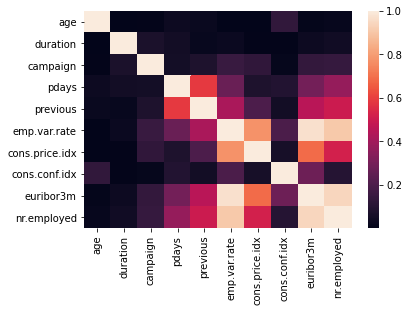

In [6]:
sns.heatmap(full.corr().abs())

Nothing too surprising here.. the social and economy variables have high correlation. which is expected given the type of data.

and.. because these variables are hard to describe using plain words. i'm actually going to exclude them for data exploration just to make things a little easier to read

In [7]:
exclude_var = ['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
full_exp = full[full.columns[~full.columns.isin(exclude_var)]]

Next i'm going to break down the categorical data to see if there's anything that stands out

In [8]:
full_exp.groupby(['poutcome']).describe(include='all')

age                                                          \
               count unique top freq       mean        std   min   25%   50%   
poutcome                                                                       
failure       4252.0    NaN NaN  NaN  39.946143  11.561874  17.0  32.0  37.0   
nonexistent  35563.0    NaN NaN  NaN  39.956190  10.025968  18.0  32.0  38.0   
success       1373.0    NaN NaN  NaN  42.023307  15.376169  17.0  30.0  37.0   

                           job                                                \
              75%   max  count unique     top  freq mean  std  min  25%  50%   
poutcome                                                                       
failure      47.0  94.0   4252     12  admin.  1091  NaN  NaN  NaN  NaN  NaN   
nonexistent  47.0  98.0  35563     12  admin.  8903  NaN  NaN  NaN  NaN  NaN   
success      52.0  98.0   1373     12  admin.   428  NaN  NaN  NaN  NaN  NaN   

                      marital                                                  \
             75%  max   count unique      top   freq mean  std  min  25%  50%   
poutcome                                                                        
failure      NaN  NaN    4252      4  married   2384  NaN  NaN  NaN  NaN  NaN   
nonexistent  NaN  NaN   35563      4  married  21821  NaN  NaN  NaN  NaN  NaN   
success      NaN  NaN    1373      4  married    723  NaN  NaN  NaN  NaN  NaN   

                      education                                             \
             75%  max     count unique                top   freq mean  std   
poutcome                                                                     
failure      NaN  NaN      4252      8  university.degree   1242  NaN  NaN   
nonexistent  NaN  NaN     35563      8  university.degree  10393  NaN  NaN   
success      NaN  NaN      1373      8  university.degree    533  NaN  NaN   

                                     default                                   \
             min  25%  50%  75%  max   count unique top   freq mean  std  min   
poutcome                                                                        
failure      NaN  NaN  NaN  NaN  NaN    4252      3  no   3735  NaN  NaN  NaN   
nonexistent  NaN  NaN  NaN  NaN  NaN   35563      3  no  27539  NaN  NaN  NaN   
success      NaN  NaN  NaN  NaN  NaN    1373      2  no   1314  NaN  NaN  NaN   

                                housing                                    \
             25%  50%  75%  max   count unique  top   freq mean  std  min   
poutcome                                                                    
failure      NaN  NaN  NaN  NaN    4252      3  yes   2354  NaN  NaN  NaN   
nonexistent  NaN  NaN  NaN  NaN   35563      3  yes  18456  NaN  NaN  NaN   
success      NaN  NaN  NaN  NaN    1373      3  yes    766  NaN  NaN  NaN   

                                  loan                                        \
             25%  50%  75%  max  count unique top   freq mean  std  min  25%   
poutcome                                                                       
failure      NaN  NaN  NaN  NaN   4252      3  no   3496  NaN  NaN  NaN  NaN   
nonexistent  NaN  NaN  NaN  NaN  35563      3  no  29316  NaN  NaN  NaN  NaN   
success      NaN  NaN  NaN  NaN   1373      3  no   1138  NaN  NaN  NaN  NaN   

                           contact                                         \
             50%  75%  max   count unique       top   freq mean  std  min   
poutcome                                                                    
failure      NaN  NaN  NaN    4252      2  cellular   3952  NaN  NaN  NaN   
nonexistent  NaN  NaN  NaN   35563      2  cellular  20922  NaN  NaN  NaN   
success      NaN  NaN  NaN    1373      2  cellular   1270  NaN  NaN  NaN   

                                 month                                         \
             25%  50%  75%  max  count unique  top   freq mean  std  min  25%   
poutcome                                   

**Quick Observation on poutcome:**
- 4252 failure, 1373 success and 35563 not in previous campaign
- the 3 groups pretty much follow the same pattern of the entire data set, with some exceptions
- day_of_week for the 'failure' group is fri and not thursday
- avg duration for the 'success' group is about 1 min higher than the other 2 groups; note here that sd is pretty high for all 3 groups. another interesting thing here is that we have very low durations of 1 sec.
- pdays here is interesting.. because we have 999 value in the 'failure' group which shouldn't be possile -> possibly bad data
- another interesting thing here is that those where poutcome = 'success' most of them have target variable y = 'y' (~65% of those that were a success target in the previous campain was also a success in current campain) **

In [9]:
full_exp.groupby(['y']).describe(include='all')

age                                                                \
       count unique top freq       mean        std   min   25%   50%   75%   
y                                                                            
no   36548.0    NaN NaN  NaN  39.911185   9.898132  17.0  32.0  38.0  47.0   
yes   4640.0    NaN NaN  NaN  40.913147  13.837476  17.0  31.0  37.0  50.0   

             job                                                          \
      max  count unique     top  freq mean  std  min  25%  50%  75%  max   
y                                                                          
no   95.0  36548     12  admin.  9070  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
yes  98.0   4640     12  admin.  1352  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

    marital                                                            \
      count unique      top   freq mean  std  min  25%  50%  75%  max   
y                                                                       
no    36548      4  married  22396  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
yes    4640      4  married   2532  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

    education                                                                 \
        count unique                top   freq mean  std  min  25%  50%  75%   
y                                                                              
no      36548      8  university.degree  10498  NaN  NaN  NaN  NaN  NaN  NaN   
yes      4640      8  university.degree   1670  NaN  NaN  NaN  NaN  NaN  NaN   

         default                                                      housing  \
     max   count unique top   freq mean  std  min  25%  50%  75%  max   count   
y                                                                               
no   NaN   36548      3  no  28391  NaN  NaN  NaN  NaN  NaN  NaN  NaN   36548   
yes  NaN    4640      2  no   4197  NaN  NaN  NaN  NaN  NaN  NaN  NaN    4640   

                                                            loan             \
    unique  top   freq mean  std  min  25%  50%  75%  max  count unique top   
y                                                                             
no       3  yes  19069  NaN  NaN  NaN  NaN  NaN  NaN  NaN  36548      3  no   
yes      3  yes   2507  NaN  NaN  NaN  NaN  NaN  NaN  NaN   4640      3  no   

                                              contact                          \
      freq mean  std  min  25%  50%  75%  max   count unique       top   freq   
y                                                                               
no   30100  NaN  NaN  NaN  NaN  NaN  NaN  NaN   36548      2  cellular  22291   
yes   3850  NaN  NaN  NaN  NaN  NaN  NaN  NaN    4640      2  cellular   3853   

                                        month                               \
    mean  std  min  25%  50%  75%  max  count unique  top   freq mean  std   
y                                                                            
no   NaN  NaN  NaN  NaN  NaN  NaN  NaN  36548     10  may  12883  NaN  NaN   
yes  NaN  NaN  NaN  NaN  NaN  NaN  NaN   4640     10  may    886  NaN  NaN   

                             day_of_week                                   \
     min  25%  50%  75%  max       count unique  top  freq mean  std  min   
y                                                                           
no   NaN  NaN  NaN  NaN  NaN       36548      5  mon  7667  NaN  NaN  NaN   
yes  NaN  NaN  NaN  NaN  NaN        4640      5  thu  1045  NaN  NaN  NaN   

                        duration                                          \
     25%  50%  75%  max    count unique top freq        mean         std   
y                                                                          
no   NaN  NaN  NaN  NaN  36548.0    NaN NaN  NaN  220.844807  207.096293   
yes  NaN  NaN  NaN  NaN   4640.0    NaN NaN  NaN  553.191164  401.171871   

                                        campaign                            \
      min    25%    50%   

**Quick Observation on target variable:**
- 4640 success and 36548 no conversion
- those in the yes group is just a tad older
- most common value for day_of_week to those in the 'no' group is mon 
- duration highly affects the outcome, but here we can see that those in the 'yes' group has much higher avg duration; altho this could be because there are 0 values in the no group (aka those that didn't get contacted)
- the avg number of contact in the yes group is lower than the no group; possible indicator that by contacting someone more will not drive conversion, but there's a outlier in the no group **
- 88% in the no group was not in previous campaign, whereas 68% in the yes group was not in the previous campaign; this is likely good indication that customer that purchased similar product is more likely to buy again **
- also nothing significant for the column contact, doesn't look to be a differentiator
<br>

the relationship we notice bewteen poutcome and current target is interesting.. i will have a quick look at the breakdown between groups

In [10]:
full_exp.groupby(['poutcome', 'y']).describe(include='all')

age                                                    \
                   count unique top freq       mean        std   min   25%   
poutcome    y                                                                
failure     no    3647.0    NaN NaN  NaN  39.626817  10.896903  17.0  32.0   
            yes    605.0    NaN NaN  NaN  41.871074  14.823015  17.0  31.0   
nonexistent no   32422.0    NaN NaN  NaN  39.935167   9.707244  18.0  32.0   
            yes   3141.0    NaN NaN  NaN  40.173193  12.862350  18.0  31.0   
success     no     479.0    NaN NaN  NaN  40.453027  13.886923  17.0  30.0   
            yes    894.0    NaN NaN  NaN  42.864653  16.061982  17.0  30.0   

                                     job                                      \
                  50%   75%   max  count unique     top  freq mean  std  min   
poutcome    y                                                                  
failure     no   37.0  46.0  94.0   3647     12  admin.   926  NaN  NaN  NaN   
            yes  38.0  51.0  92.0    605     12  admin.   165  NaN  NaN  NaN   
nonexistent no   38.0  47.0  95.0  32422     12  admin.  8002  NaN  NaN  NaN   
            yes  37.0  48.0  98.0   3141     12  admin.   901  NaN  NaN  NaN   
success     no   37.0  49.0  92.0    479     12  admin.   142  NaN  NaN  NaN   
            yes  38.0  54.0  98.0    894     12  admin.   286  NaN  NaN  NaN   

                                    marital                                   \
                 25%  50%  75%  max   count unique      top   freq mean  std   
poutcome    y                                                                  
failure     no   NaN  NaN  NaN  NaN    3647      4  married   2046  NaN  NaN   
            yes  NaN  NaN  NaN  NaN     605      4  married    338  NaN  NaN   
nonexistent no   NaN  NaN  NaN  NaN   32422      4  married  20096  NaN  NaN   
            yes  NaN  NaN  NaN  NaN    3141      4  married   1725  NaN  NaN   
success     no   NaN  NaN  NaN  NaN     479      4  married    254  NaN  NaN   
            yes  NaN  NaN  NaN  NaN     894      4  married    469  NaN  NaN   

                                         education                            \
                 min  25%  50%  75%  max     count unique                top   
poutcome    y                                                                  
failure     no   NaN  NaN  NaN  NaN  NaN      3647      8  university.degree   
            yes  NaN  NaN  NaN  NaN  NaN       605      7  university.degree   
nonexistent no   NaN  NaN  NaN  NaN  NaN     32422      8  university.degree   
            yes  NaN  NaN  NaN  NaN  NaN      3141      8  university.degree   
success     no   NaN  NaN  NaN  NaN  NaN       479      7  university.degree   
            yes  NaN  NaN  NaN  NaN  NaN       894      8  university.degree   

                                                         default             \
                 freq mean  std  min  25%  50%  75%  max   count unique top   
poutcome    y                                                                 
failure     no   1038  NaN  NaN  NaN  NaN  NaN  NaN  NaN    3647      3  no   
            yes   204  NaN  NaN  NaN  NaN  NaN  NaN  NaN     605      2  no   
nonexistent no   9279  NaN  NaN  NaN  NaN  NaN  NaN  NaN   32422      3  no   
            yes  1114  NaN  NaN  NaN  NaN  NaN  NaN  NaN    3141      2  no   
success     no    181  NaN  NaN  NaN  NaN  NaN  NaN  NaN     479      2  no   
            yes   352  NaN  NaN  NaN  NaN  NaN  NaN  NaN     894      2  no   

                                                          housing              \
                  freq mean  std  min  25%  50%  75%  max   count unique  top   
poutcome    y                                                                   
failure     no    3162  NaN  NaN  NaN  NaN  NaN  NaN  NaN    3647      3  yes   
            yes    573  NaN  NaN  NaN  NaN  NaN  NaN  NaN     605      3  yes   
nonexistent no   24781  NaN  NaN  NaN 

**Observation:**
- 14% subbed in 'failure' group
- 9% subbed in 'nonexistent' group
- 65% subbed in the 'success' group, this is a huge difference **
- again.. those that subbed is just a tad older
- same with number of contact, again.. lower in the yes group

In [11]:
full_exp.groupby(['loan']).describe(include='all')

age                                                          \
           count unique top freq       mean        std   min   25%   50%   
loan                                                                       
no       33950.0    NaN NaN  NaN  40.058822  10.432882  17.0  32.0  38.0   
unknown    990.0    NaN NaN  NaN  39.951515  10.381776  17.0  32.0  38.0   
yes       6248.0    NaN NaN  NaN  39.846671  10.363886  17.0  32.0  38.0   

                       job                                                     \
          75%   max  count unique          top  freq mean  std  min  25%  50%   
loan                                                                            
no       47.0  98.0  33950     12       admin.  8485  NaN  NaN  NaN  NaN  NaN   
unknown  47.0  86.0    990     12  blue-collar   240  NaN  NaN  NaN  NaN  NaN   
yes      47.0  92.0   6248     12       admin.  1710  NaN  NaN  NaN  NaN  NaN   

                  marital                                                  \
         75%  max   count unique      top   freq mean  std  min  25%  50%   
loan                                                                        
no       NaN  NaN   33950      4  married  20567  NaN  NaN  NaN  NaN  NaN   
unknown  NaN  NaN     990      4  married    588  NaN  NaN  NaN  NaN  NaN   
yes      NaN  NaN    6248      4  married   3773  NaN  NaN  NaN  NaN  NaN   

                  education                                                 \
         75%  max     count unique                top  freq mean  std  min   
loan                                                                         
no       NaN  NaN     33950      8  university.degree  9961  NaN  NaN  NaN   
unknown  NaN  NaN       990      7  university.degree   277  NaN  NaN  NaN   
yes      NaN  NaN      6248      8  university.degree  1930  NaN  NaN  NaN   

                            default                                        \
         25%  50%  75%  max   count unique top   freq mean  std  min  25%   
loan                                                                        
no       NaN  NaN  NaN  NaN   33950      3  no  26849  NaN  NaN  NaN  NaN   
unknown  NaN  NaN  NaN  NaN     990      2  no    763  NaN  NaN  NaN  NaN   
yes      NaN  NaN  NaN  NaN    6248      2  no   4976  NaN  NaN  NaN  NaN   

                       housing                                             \
         50%  75%  max   count unique      top   freq mean  std  min  25%   
loan                                                                        
no       NaN  NaN  NaN   33950      2      yes  17885  NaN  NaN  NaN  NaN   
unknown  NaN  NaN  NaN     990      1  unknown    990  NaN  NaN  NaN  NaN   
yes      NaN  NaN  NaN    6248      2      yes   3691  NaN  NaN  NaN  NaN   

                       contact                                              \
         50%  75%  max   count unique       top   freq mean  std  min  25%   
loan                                                                         
no       NaN  NaN  NaN   33950      2  cellular  21522  NaN  NaN  NaN  NaN   
unknown  NaN  NaN  NaN     990      2  cellular    561  NaN  NaN  NaN  NaN   
yes      NaN  NaN  NaN    6248      2  cellular   4061  NaN  NaN  NaN  NaN   

                        month                                              \
         50%  75%  max  count unique  top   freq mean  std  min  25%  50%   
loan                                                                        
no       NaN  NaN  NaN  33950     10  may  11328  NaN  NaN  NaN  NaN  NaN   
unknown  NaN  NaN  NaN    990     10  may    350  NaN  NaN  NaN  NaN  NaN   
yes      NaN  NaN  NaN   6248     10  may   2091  NaN  NaN  NaN  NaN  NaN   

                  day_of_week                                                  \
         75%  max       count unique  top  freq mean  std  min  25%  50%  75%   
loan                                                                            
no       NaN  NaN       33950      5

**Observation:**
- 2% of data is unknown, housing loan info is tied with this. probably same source of data (where loan = unknonw, housing = unknown) **
- 11% of those in 'yes loan' group subbed and 12% of those in 'no loan' group subbed. so nothing interesting here

In [12]:
full_exp.groupby(['housing']).describe(include='all')

age                                                          \
           count unique top freq       mean        std   min   25%   50%   
housing                                                                    
no       18622.0    NaN NaN  NaN  40.044195  10.335624  17.0  32.0  38.0   
unknown    990.0    NaN NaN  NaN  39.951515  10.381776  17.0  32.0  38.0   
yes      21576.0    NaN NaN  NaN  40.010011  10.496826  17.0  32.0  38.0   

                       job                                                     \
          75%   max  count unique          top  freq mean  std  min  25%  50%   
housing                                                                         
no       47.0  95.0  18622     12       admin.  4636  NaN  NaN  NaN  NaN  NaN   
unknown  47.0  86.0    990     12  blue-collar   240  NaN  NaN  NaN  NaN  NaN   
yes      47.0  98.0  21576     12       admin.  5559  NaN  NaN  NaN  NaN  NaN   

                  marital                                                  \
         75%  max   count unique      top   freq mean  std  min  25%  50%   
housing                                                                     
no       NaN  NaN   18622      4  married  11389  NaN  NaN  NaN  NaN  NaN   
unknown  NaN  NaN     990      4  married    588  NaN  NaN  NaN  NaN  NaN   
yes      NaN  NaN   21576      4  married  12951  NaN  NaN  NaN  NaN  NaN   

                  education                                                 \
         75%  max     count unique                top  freq mean  std  min   
housing                                                                      
no       NaN  NaN     18622      8  university.degree  5387  NaN  NaN  NaN   
unknown  NaN  NaN       990      7  university.degree   277  NaN  NaN  NaN   
yes      NaN  NaN     21576      8  university.degree  6504  NaN  NaN  NaN   

                            default                                        \
         25%  50%  75%  max   count unique top   freq mean  std  min  25%   
housing                                                                     
no       NaN  NaN  NaN  NaN   18622      3  no  14614  NaN  NaN  NaN  NaN   
unknown  NaN  NaN  NaN  NaN     990      2  no    763  NaN  NaN  NaN  NaN   
yes      NaN  NaN  NaN  NaN   21576      3  no  17211  NaN  NaN  NaN  NaN   

                         loan                                                  \
         50%  75%  max  count unique      top   freq mean  std  min  25%  50%   
housing                                                                         
no       NaN  NaN  NaN  18622      2       no  16065  NaN  NaN  NaN  NaN  NaN   
unknown  NaN  NaN  NaN    990      1  unknown    990  NaN  NaN  NaN  NaN  NaN   
yes      NaN  NaN  NaN  21576      2       no  17885  NaN  NaN  NaN  NaN  NaN   

                  contact                                                   \
         75%  max   count unique       top   freq mean  std  min  25%  50%   
housing                                                                      
no       NaN  NaN   18622      2  cellular  11051  NaN  NaN  NaN  NaN  NaN   
unknown  NaN  NaN     990      2  cellular    561  NaN  NaN  NaN  NaN  NaN   
yes      NaN  NaN   21576      2  cellular  14532  NaN  NaN  NaN  NaN  NaN   

                   month                                                       \
         75%  max  count unique  top  freq mean  std  min  25%  50%  75%  max   
housing                                                                         
no       NaN  NaN  18622     10  may  6430  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
unknown  NaN  NaN    990     10  may   350  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
yes      NaN  NaN  21576     10  may  6989  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

        day_of_week                                                       \
              count unique  top  freq mean  std  min  25%  50%  75%  max   
housing                                                                    
no 

**Observation:**
- like loan, 2% of data unknown
- 9% of each group subbed. virtually no difference, same as loan above pretty much **

In [13]:
full_exp.groupby(['default']).describe(include='all')

age                                                          \
           count unique top freq       mean        std   min   25%   50%   
default                                                                    
no       32588.0    NaN NaN  NaN  39.140635  10.477032  17.0  31.0  37.0   
unknown   8597.0    NaN NaN  NaN  43.371990   9.488981  19.0  36.0  43.0   
yes          3.0    NaN NaN  NaN  42.333333   9.814955  31.0  39.5  48.0   

                       job                                                     \
          75%   max  count unique          top  freq mean  std  min  25%  50%   
default                                                                         
no       46.0  95.0  32588     12       admin.  9129  NaN  NaN  NaN  NaN  NaN   
unknown  51.0  98.0   8597     12  blue-collar  3166  NaN  NaN  NaN  NaN  NaN   
yes      48.0  48.0      3      2   technician     2  NaN  NaN  NaN  NaN  NaN   

                  marital                                                  \
         75%  max   count unique      top   freq mean  std  min  25%  50%   
default                                                                     
no       NaN  NaN   32588      4  married  18655  NaN  NaN  NaN  NaN  NaN   
unknown  NaN  NaN    8597      4  married   6270  NaN  NaN  NaN  NaN  NaN   
yes      NaN  NaN       3      1  married      3  NaN  NaN  NaN  NaN  NaN   

                  education                                                    \
         75%  max     count unique                  top   freq mean  std  min   
default                                                                         
no       NaN  NaN     32588      8    university.degree  10718  NaN  NaN  NaN   
unknown  NaN  NaN      8597      8             basic.4y   1699  NaN  NaN  NaN   
yes      NaN  NaN         3      2  professional.course      2  NaN  NaN  NaN   

                            housing                                         \
         25%  50%  75%  max   count unique  top   freq mean  std  min  25%   
default                                                                      
no       NaN  NaN  NaN  NaN   32588      3  yes  17211  NaN  NaN  NaN  NaN   
unknown  NaN  NaN  NaN  NaN    8597      3  yes   4364  NaN  NaN  NaN  NaN   
yes      NaN  NaN  NaN  NaN       3      2   no      2  NaN  NaN  NaN  NaN   

                         loan                                                  \
         50%  75%  max  count unique top   freq mean  std  min  25%  50%  75%   
default                                                                         
no       NaN  NaN  NaN  32588      3  no  26849  NaN  NaN  NaN  NaN  NaN  NaN   
unknown  NaN  NaN  NaN   8597      3  no   7098  NaN  NaN  NaN  NaN  NaN  NaN   
yes      NaN  NaN  NaN      3      1  no      3  NaN  NaN  NaN  NaN  NaN  NaN   

             contact                                                        \
         max   count unique       top   freq mean  std  min  25%  50%  75%   
default                                                                      
no       NaN   32588      2  cellular  21777  NaN  NaN  NaN  NaN  NaN  NaN   
unknown  NaN    8597      2  cellular   4364  NaN  NaN  NaN  NaN  NaN  NaN   
yes      NaN       3      1  cellular      3  NaN  NaN  NaN  NaN  NaN  NaN   

              month                                                        \
         max  count unique  top   freq mean  std  min  25%  50%  75%  max   
default                                                                     
no       NaN  32588     10  may  10364  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
unknown  NaN   8597     10  may   3405  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
yes      NaN      3      2  aug      2  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

        day_of_week                                                       \
              count unique  top  freq mean  std  min  25%  50%  75%  max   
default                                                                    
no 

**Observation**
- so only 3 ppl had credit default.. this is a pretty inbalance column will likely exclude from modelling**

In [14]:
full_exp.groupby(['job']).describe(include='all')

age                                                    \
                 count unique top freq       mean        std   min   25%   
job                                                                        
admin.         10422.0    NaN NaN  NaN  38.187296   8.907151  20.0  31.0   
blue-collar     9254.0    NaN NaN  NaN  39.555760   8.827396  20.0  33.0   
entrepreneur    1456.0    NaN NaN  NaN  41.723214   8.910840  20.0  35.0   
housemaid       1060.0    NaN NaN  NaN  45.500000  10.791220  21.0  37.0   
management      2924.0    NaN NaN  NaN  42.362859   9.303820  21.0  35.0   
retired         1720.0    NaN NaN  NaN  62.027326  10.493293  23.0  56.0   
self-employed   1421.0    NaN NaN  NaN  39.949331   9.422417  21.0  32.0   
services        3969.0    NaN NaN  NaN  37.926430   9.018749  20.0  31.0   
student          875.0    NaN NaN  NaN  25.894857   4.991334  17.0  22.0   
technician      6743.0    NaN NaN  NaN  38.507638   8.660968  20.0  32.0   
unemployed      1014.0    NaN NaN  NaN  39.733728   9.267022  21.0  32.0   
unknown          330.0    NaN NaN  NaN  45.563636  11.159954  24.0  37.0   

                                marital                                       \
                50%   75%   max   count unique      top  freq mean  std  min   
job                                                                            
admin.         36.0  44.0  72.0   10422      4  married  5253  NaN  NaN  NaN   
blue-collar    39.0  46.0  80.0    9254      4  married  6687  NaN  NaN  NaN   
entrepreneur   41.0  49.0  69.0    1456      4  married  1071  NaN  NaN  NaN   
housemaid      45.0  53.0  85.0    1060      4  married   777  NaN  NaN  NaN   
management     42.0  50.0  80.0    2924      4  married  2089  NaN  NaN  NaN   
retired        59.0  69.0  98.0    1720      4  married  1274  NaN  NaN  NaN   
self-employed  39.0  47.0  71.0    1421      4  married   904  NaN  NaN  NaN   
services       36.0  45.0  69.0    3969      4  married  2294  NaN  NaN  NaN   
student        25.0  29.0  47.0     875      4   single   824  NaN  NaN  NaN   
technician     37.0  44.0  70.0    6743      4  married  3670  NaN  NaN  NaN   
unemployed     39.0  47.0  66.0    1014      4  married   634  NaN  NaN  NaN   
unknown        45.0  53.0  81.0     330      4  married   234  NaN  NaN  NaN   

                                  education                                    \
               25%  50%  75%  max     count unique                  top  freq   
job                                                                             
admin.         NaN  NaN  NaN  NaN     10422      8    university.degree  5753   
blue-collar    NaN  NaN  NaN  NaN      9254      8             basic.9y  3623   
entrepreneur   NaN  NaN  NaN  NaN      1456      8    university.degree   610   
housemaid      NaN  NaN  NaN  NaN      1060      8             basic.4y   474   
management     NaN  NaN  NaN  NaN      2924      7    university.degree  2063   
retired        NaN  NaN  NaN  NaN      1720      8             basic.4y   597   
self-employed  NaN  NaN  NaN  NaN      1421      8    university.degree   765   
services       NaN  NaN  NaN  NaN      3969      7          high.school  2682   
student        NaN  NaN  NaN  NaN       875      7          high.school   357   
technician     NaN  NaN  NaN  NaN      6743      7  professional.course  3320   
unemployed     NaN  NaN  NaN  NaN      1014      7    university.degree   262   
unknown        NaN  NaN  NaN  NaN       330      7              unknown   131   

                                                 default                   \
              mean  std  min  25%  50%  75%  max   count unique top  freq   
job                                                                         
admin.         NaN  NaN  NaN  NaN  NaN  NaN  NaN   10422      2  no  9129   
blue-collar    NaN  NaN  NaN  NaN  NaN  NaN  NaN    9254      2  no  6088   
entrepreneur   NaN  NaN  NaN  NaN  NaN  NaN  NaN    1456      2  no  1155   

**Observation:**
- less than 1% data here is unknown
- obvious age difference due to different job type (i.e. student and retired), same goes to marital status and education
- unexpected data to see here is that majority of students have housing loan
- 13% admin in yes group
- 7% blue-collar in yes group
- 9% entrepreneur in yes group
- 10% housemaid in yes group
- 12% housemaid in yes group
- 26% retired in yes group
- 11% self-employed in yes group
- 18% services in yes group
- 32% student in yes group
- 11% technician in yes group
- 14% unknown in yes group

our retired and student group has highest sub %, and blue-collar and entrepreneur have the lowest sub%. student group is suprising but I assume this is mature students given avg age is 26 **

In [15]:
full_exp.groupby(['marital']).describe(include='all')

age                                                          \
            count unique top freq       mean        std   min   25%   50%   
marital                                                                     
divorced   4612.0    NaN NaN  NaN  44.899393  10.625599  24.0  37.0  44.0   
married   24928.0    NaN NaN  NaN  42.307165  10.018179  20.0  34.0  41.0   
single    11568.0    NaN NaN  NaN  33.158714   7.534553  17.0  28.0  32.0   
unknown      80.0    NaN NaN  NaN  40.275000  10.784394  25.0  32.0  35.5   

                        job                                                \
           75%   max  count unique          top  freq mean  std  min  25%   
marital                                                                     
divorced  52.0  95.0   4612     12       admin.  1280  NaN  NaN  NaN  NaN   
married   49.0  98.0  24928     12  blue-collar  6687  NaN  NaN  NaN  NaN   
single    37.0  86.0  11568     12       admin.  3875  NaN  NaN  NaN  NaN   
unknown   50.0  66.0     80     12  blue-collar    14  NaN  NaN  NaN  NaN   

                        education                                            \
          50%  75%  max     count unique                top  freq mean  std   
marital                                                                       
divorced  NaN  NaN  NaN      4612      8  university.degree  1337  NaN  NaN   
married   NaN  NaN  NaN     24928      8  university.degree  6394  NaN  NaN   
single    NaN  NaN  NaN     11568      8  university.degree  4406  NaN  NaN   
unknown   NaN  NaN  NaN        80      7  university.degree    31  NaN  NaN   

                                  default                                   \
          min  25%  50%  75%  max   count unique top   freq mean  std  min   
marital                                                                      
divorced  NaN  NaN  NaN  NaN  NaN    4612      2  no   3781  NaN  NaN  NaN   
married   NaN  NaN  NaN  NaN  NaN   24928      3  no  18655  NaN  NaN  NaN   
single    NaN  NaN  NaN  NaN  NaN   11568      2  no  10083  NaN  NaN  NaN   
unknown   NaN  NaN  NaN  NaN  NaN      80      2  no     69  NaN  NaN  NaN   

                             housing                                         \
          25%  50%  75%  max   count unique  top   freq mean  std  min  25%   
marital                                                                       
divorced  NaN  NaN  NaN  NaN    4612      3  yes   2399  NaN  NaN  NaN  NaN   
married   NaN  NaN  NaN  NaN   24928      3  yes  12951  NaN  NaN  NaN  NaN   
single    NaN  NaN  NaN  NaN   11568      3  yes   6191  NaN  NaN  NaN  NaN   
unknown   NaN  NaN  NaN  NaN      80      3   no     44  NaN  NaN  NaN  NaN   

                          loan                                             \
          50%  75%  max  count unique top   freq mean  std  min  25%  50%   
marital                                                                     
divorced  NaN  NaN  NaN   4612      3  no   3816  NaN  NaN  NaN  NaN  NaN   
married   NaN  NaN  NaN  24928      3  no  20567  NaN  NaN  NaN  NaN  NaN   
single    NaN  NaN  NaN  11568      3  no   9500  NaN  NaN  NaN  NaN  NaN   
unknown   NaN  NaN  NaN     80      3  no     67  NaN  NaN  NaN  NaN  NaN   

                   contact                                                   \
          75%  max   count unique       top   freq mean  std  min  25%  50%   
marital                                                                       
divorced  NaN  NaN    4612      2  cellular   2908  NaN  NaN  NaN  NaN  NaN   
married   NaN  NaN   24928      2  cellular  15206  NaN  NaN  NaN  NaN  NaN   
single    NaN  NaN   11568      2  cellular   7977  NaN  NaN  NaN  NaN  NaN   
unknown   NaN  NaN      80      2  cellular     53  NaN  NaN  NaN  NaN  NaN   

                    month                                                  \
          75%  max  count unique  top  freq mean  std  min  25%  50%  75%   
marital                        

**Observation:**
- less than 1% data unknown
- single people are younger as expected
- 11% divorced in yes group
- 11% married in yes group
- 15% single in yes group

single group is slightly higher, but i suspect that this is due to age and not marital status **

In [16]:
full_exp.groupby(['education']).describe(include='all')

age                                              \
                       count unique top freq       mean        std   min   
education                                                                  
basic.4y              4176.0    NaN NaN  NaN  47.596504  12.125858  18.0   
basic.6y              2292.0    NaN NaN  NaN  40.448953   8.689539  18.0   
basic.9y              6045.0    NaN NaN  NaN  39.061208   9.585428  17.0   
high.school           9515.0    NaN NaN  NaN  37.998213   9.707521  18.0   
illiterate              18.0    NaN NaN  NaN  48.500000  10.945050  34.0   
professional.course   5243.0    NaN NaN  NaN  40.080107   9.896492  20.0   
university.degree    12168.0    NaN NaN  NaN  38.879191   9.622309  20.0   
unknown               1731.0    NaN NaN  NaN  43.481225  12.488426  17.0   

                                                job                            \
                      25%   50%    75%   max  count unique          top  freq   
education                                                                       
basic.4y             39.0  47.0  55.00  98.0   4176     12  blue-collar  2318   
basic.6y             34.0  39.0  46.00  95.0   2292     12  blue-collar  1426   
basic.9y             32.0  38.0  46.00  94.0   6045     12  blue-collar  3623   
high.school          31.0  36.0  44.00  88.0   9515     12       admin.  3329   
illiterate           42.5  48.0  53.25  80.0     18      6  blue-collar     8   
professional.course  33.0  38.0  47.00  86.0   5243     12   technician  3320   
university.degree    32.0  36.0  45.00  91.0  12168     12       admin.  5753   
unknown              35.0  43.0  52.00  92.0   1731     12  blue-collar   454   

                                                       marital         \
                    mean  std  min  25%  50%  75%  max   count unique   
education                                                               
basic.4y             NaN  NaN  NaN  NaN  NaN  NaN  NaN    4176      4   
basic.6y             NaN  NaN  NaN  NaN  NaN  NaN  NaN    2292      4   
basic.9y             NaN  NaN  NaN  NaN  NaN  NaN  NaN    6045      4   
high.school          NaN  NaN  NaN  NaN  NaN  NaN  NaN    9515      4   
illiterate           NaN  NaN  NaN  NaN  NaN  NaN  NaN      18      3   
professional.course  NaN  NaN  NaN  NaN  NaN  NaN  NaN    5243      4   
university.degree    NaN  NaN  NaN  NaN  NaN  NaN  NaN   12168      4   
unknown              NaN  NaN  NaN  NaN  NaN  NaN  NaN    1731      4   

                                                                      default  \
                         top  freq mean  std  min  25%  50%  75%  max   count   
education                                                                       
basic.4y             married  3228  NaN  NaN  NaN  NaN  NaN  NaN  NaN    4176   
basic.6y             married  1767  NaN  NaN  NaN  NaN  NaN  NaN  NaN    2292   
basic.9y             married  4156  NaN  NaN  NaN  NaN  NaN  NaN  NaN    6045   
high.school          married  5158  NaN  NaN  NaN  NaN  NaN  NaN  NaN    9515   
illiterate           married    15  NaN  NaN  NaN  NaN  NaN  NaN  NaN      18   
professional.course  married  3156  NaN  NaN  NaN  NaN  NaN  NaN  NaN    5243   
university.degree    married  6394  NaN  NaN  NaN  NaN  NaN  NaN  NaN   12168   
unknown              married  1054  NaN  NaN  NaN  NaN  NaN  NaN  NaN    1731   

                                                                          \
                    unique top   freq mean  std  min  25%  50%  75%  max   
education                                                                  
basic.4y                 2  no   2477  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
basic.6y                 2  no   1441  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
basic.9y                 2  no   4418  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
high.school              3  no   7904  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
illiterate               2  no     11  NaN  NaN  NaN  NaN  NaN  NaN 

**Observation:**
- 4% of data unknown
- job and education closely tied, not surprised
- only 18 in the illiterate group
- uni degree had highest sub % (14%) vs rest of them. which hovers around 9-12% **

In [17]:
full_exp.groupby(['contact']).describe(include='all')

age                                                          \
             count unique top freq       mean        std   min   25%   50%   
contact                                                                      
cellular   26144.0    NaN NaN  NaN  39.968559  10.953041  17.0  32.0  38.0   
telephone  15044.0    NaN NaN  NaN  40.120513   9.425555  18.0  33.0  39.0   

                         job                                                \
            75%   max  count unique          top  freq mean  std  min  25%   
contact                                                                      
cellular   47.0  98.0  26144     12       admin.  7126  NaN  NaN  NaN  NaN   
telephone  47.0  86.0  15044     12  blue-collar  4164  NaN  NaN  NaN  NaN   

                         marital                                             \
           50%  75%  max   count unique      top   freq mean  std  min  25%   
contact                                                                       
cellular   NaN  NaN  NaN   26144      4  married  15206  NaN  NaN  NaN  NaN   
telephone  NaN  NaN  NaN   15044      4  married   9722  NaN  NaN  NaN  NaN   

                         education                                            \
           50%  75%  max     count unique                top  freq mean  std   
contact                                                                        
cellular   NaN  NaN  NaN     26144      8  university.degree  8657  NaN  NaN   
telephone  NaN  NaN  NaN     15044      8        high.school  3587  NaN  NaN   

                                   default                                   \
           min  25%  50%  75%  max   count unique top   freq mean  std  min   
contact                                                                       
cellular   NaN  NaN  NaN  NaN  NaN   26144      3  no  21777  NaN  NaN  NaN   
telephone  NaN  NaN  NaN  NaN  NaN   15044      2  no  10811  NaN  NaN  NaN   

                              housing                                         \
           25%  50%  75%  max   count unique  top   freq mean  std  min  25%   
contact                                                                        
cellular   NaN  NaN  NaN  NaN   26144      3  yes  14532  NaN  NaN  NaN  NaN   
telephone  NaN  NaN  NaN  NaN   15044      3   no   7571  NaN  NaN  NaN  NaN   

                           loan                                             \
           50%  75%  max  count unique top   freq mean  std  min  25%  50%   
contact                                                                      
cellular   NaN  NaN  NaN  26144      3  no  21522  NaN  NaN  NaN  NaN  NaN   
telephone  NaN  NaN  NaN  15044      3  no  12428  NaN  NaN  NaN  NaN  NaN   

                     month                                                  \
           75%  max  count unique  top  freq mean  std  min  25%  50%  75%   
contact                                                                      
cellular   NaN  NaN  26144     10  jul  6096  NaN  NaN  NaN  NaN  NaN  NaN   
telephone  NaN  NaN  15044     10  may  8251  NaN  NaN  NaN  NaN  NaN  NaN   

               day_of_week                                                  \
           max       count unique  top  freq mean  std  min  25%  50%  75%   
contact                                                                      
cellular   NaN       26144      5  thu  5805  NaN  NaN  NaN  NaN  NaN  NaN   
telephone  NaN       15044      5  fri  3182  NaN  NaN  NaN  NaN  NaN  NaN   

               duration                                                      \
           max    count unique top freq        mean         std  min    25%   
contact                                                                       
cellular   NaN  26144.0    NaN NaN  NaN  263.527846  257.445288  0.0  105.0   
telephone  NaN  15044.0    NaN NaN  NaN  249.173823  262.195190  0.0   97.0   

                                campaign                              

**Obsevation:** <br>
-15% cell subbed and 6% of telephone subbed, i think this is mainly due to job type and not the contact method
-will include this column regardless

In [113]:
full_exp.groupby(['day_of_week']).describe(include='all')

age                                                          \
              count unique top freq       mean        std   min   25%   50%   
day_of_week                                                                   
fri          7827.0    NaN NaN  NaN  40.177846  10.365678  17.0  32.0  38.0   
mon          8514.0    NaN NaN  NaN  40.412497  10.268928  18.0  33.0  39.0   
thu          8623.0    NaN NaN  NaN  39.591557  10.387290  18.0  32.0  38.0   
tue          8090.0    NaN NaN  NaN  40.427441  10.600267  17.0  32.0  38.0   
wed          8134.0    NaN NaN  NaN  39.526801  10.453916  17.0  32.0  37.0   

                          job                                                \
              75%   max count unique     top  freq mean  std  min  25%  50%   
day_of_week                                                                   
fri          47.0  98.0  7827     12  admin.  2050  NaN  NaN  NaN  NaN  NaN   
mon          47.0  89.0  8514     12  admin.  2149  NaN  NaN  NaN  NaN  NaN   
thu          46.0  95.0  8623     12  admin.  2153  NaN  NaN  NaN  NaN  NaN   
tue          48.0  92.0  8090     12  admin.  2034  NaN  NaN  NaN  NaN  NaN   
wed          46.0  94.0  8134     12  admin.  2036  NaN  NaN  NaN  NaN  NaN   

                      marital                                                 \
             75%  max   count unique      top  freq mean  std  min  25%  50%   
day_of_week                                                                    
fri          NaN  NaN    7827      4  married  4791  NaN  NaN  NaN  NaN  NaN   
mon          NaN  NaN    8514      4  married  5194  NaN  NaN  NaN  NaN  NaN   
thu          NaN  NaN    8623      4  married  5147  NaN  NaN  NaN  NaN  NaN   
tue          NaN  NaN    8090      4  married  4906  NaN  NaN  NaN  NaN  NaN   
wed          NaN  NaN    8134      4  married  4890  NaN  NaN  NaN  NaN  NaN   

                      education                                            \
             75%  max     count unique                top  freq mean  std   
day_of_week                                                                 
fri          NaN  NaN      7827      8  university.degree  2271  NaN  NaN   
mon          NaN  NaN      8514      8  university.degree  2571  NaN  NaN   
thu          NaN  NaN      8623      8  university.degree  2658  NaN  NaN   
tue          NaN  NaN      8090      8  university.degree  2307  NaN  NaN   
wed          NaN  NaN      8134      8  university.degree  2361  NaN  NaN   

                                     default                                  \
             min  25%  50%  75%  max   count unique top  freq mean  std  min   
day_of_week                                                                    
fri          NaN  NaN  NaN  NaN  NaN    7827      2  no  6166  NaN  NaN  NaN   
mon          NaN  NaN  NaN  NaN  NaN    8514      2  no  6688  NaN  NaN  NaN   
thu          NaN  NaN  NaN  NaN  NaN    8623      2  no  6856  NaN  NaN  NaN   
tue          NaN  NaN  NaN  NaN  NaN    8090      3  no  6379  NaN  NaN  NaN   
wed          NaN  NaN  NaN  NaN  NaN    8134      2  no  6499  NaN  NaN  NaN   

                                housing                                        \
             25%  50%  75%  max   count unique  top  freq mean  std  min  25%   
day_of_week                                                                     
fri          NaN  NaN  NaN  NaN    7827      3  yes  3969  NaN  NaN  NaN  NaN   
mon          NaN  NaN  NaN  NaN    8514      3  yes  4563  NaN  NaN  NaN  NaN   
thu          NaN  NaN  NaN  NaN    8623      3  yes  4624  NaN  NaN  NaN  NaN   
tue          NaN  NaN  NaN  NaN    8090      3  yes  4146  NaN  NaN  NaN  NaN   
wed          NaN  NaN  NaN  NaN    8134      3  yes  4274  NaN  NaN  NaN  NaN   

                            loan                                            \
             50%  75%  max count unique top  freq mean  std  min  25%  50%   
day_of_week                                   

**Observation:**
data is pretty evenly distributed

In [114]:
full_exp.groupby(['month']).describe(include='all')

age                                                                \
         count unique top freq       mean        std   min   25%   50%   75%   
month                                                                          
apr     2632.0    NaN NaN  NaN  40.593845  11.527120  18.0  33.0  39.0  47.0   
aug     6178.0    NaN NaN  NaN  41.644221  10.487286  17.0  33.0  40.0  49.0   
dec      182.0    NaN NaN  NaN  47.307692  16.778500  18.0  34.0  46.5  59.0   
jul     7174.0    NaN NaN  NaN  39.035545  10.407452  19.0  31.0  37.0  47.0   
jun     5318.0    NaN NaN  NaN  39.766077   9.736002  18.0  32.0  38.0  47.0   
mar      546.0    NaN NaN  NaN  40.778388  16.171681  18.0  29.0  34.0  50.0   
may    13769.0    NaN NaN  NaN  39.031084   9.193702  18.0  32.0  37.0  45.0   
nov     4101.0    NaN NaN  NaN  40.965618   9.651161  18.0  33.0  39.0  48.0   
oct      718.0    NaN NaN  NaN  44.171309  16.544262  17.0  31.0  38.0  56.0   
sep      570.0    NaN NaN  NaN  43.621053  16.579793  18.0  31.0  38.5  55.0   

               job                                                          \
        max  count unique          top  freq mean  std  min  25%  50%  75%   
month                                                                        
apr    85.0   2632     12       admin.   644  NaN  NaN  NaN  NaN  NaN  NaN   
aug    92.0   6178     12       admin.  2039  NaN  NaN  NaN  NaN  NaN  NaN   
dec    86.0    182     12       admin.    50  NaN  NaN  NaN  NaN  NaN  NaN   
jul    84.0   7174     12       admin.  1815  NaN  NaN  NaN  NaN  NaN  NaN   
jun    89.0   5318     12  blue-collar  1385  NaN  NaN  NaN  NaN  NaN  NaN   
mar    95.0    546     12       admin.   169  NaN  NaN  NaN  NaN  NaN  NaN   
may    92.0  13769     12  blue-collar  4199  NaN  NaN  NaN  NaN  NaN  NaN   
nov    94.0   4101     12       admin.  1085  NaN  NaN  NaN  NaN  NaN  NaN   
oct    98.0    718     12       admin.   197  NaN  NaN  NaN  NaN  NaN  NaN   
sep    91.0    570     12       admin.   166  NaN  NaN  NaN  NaN  NaN  NaN   

           marital                                                           \
       max   count unique      top  freq mean  std  min  25%  50%  75%  max   
month                                                                         
apr    NaN    2632      4  married  1512  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
aug    NaN    6178      4  married  4012  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
dec    NaN     182      3  married   114  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
jul    NaN    7174      4  married  3948  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
jun    NaN    5318      4  married  3350  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
mar    NaN     546      4   single   249  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
may    NaN   13769      4  married  8514  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
nov    NaN    4101      4  married  2514  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
oct    NaN     718      4  married   399  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
sep    NaN     570      3  married   331  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

      education                                                                \
          count unique                top  freq mean  std  min  25%  50%  75%   
month                                                                           
apr        2632      8  university.degree   795  NaN  NaN  NaN  NaN  NaN  NaN   
aug        6178      8  university.degree  2836  NaN  NaN  NaN  NaN  NaN  NaN   
dec         182      6  university.degree    70  NaN  NaN  NaN  NaN  NaN  NaN   
jul        7174      8        high.school  1860  NaN  NaN  NaN  NaN  NaN  NaN   
jun        5318      7  university.degree  1380  NaN  NaN  NaN  NaN  NaN  NaN   
mar         546      7  university.degree   236  NaN  NaN  NaN  NaN  NaN  NaN   
may       13769      8        high.school  3515  NaN  NaN  NaN  NaN  NaN  NaN   
nov        4101      8  university.degree  1585  NaN  NaN  NaN  NaN  NaN  NaN   
oct         718      7  university.d

Now I want to have a look at the numeric variables and see if i can find any relationship between them and target variable. we will do this by plotting most of them

In [291]:
sns.set(rc = {'figure.figsize':(15,10)})

<AxesSubplot:xlabel='age', ylabel='Count'>

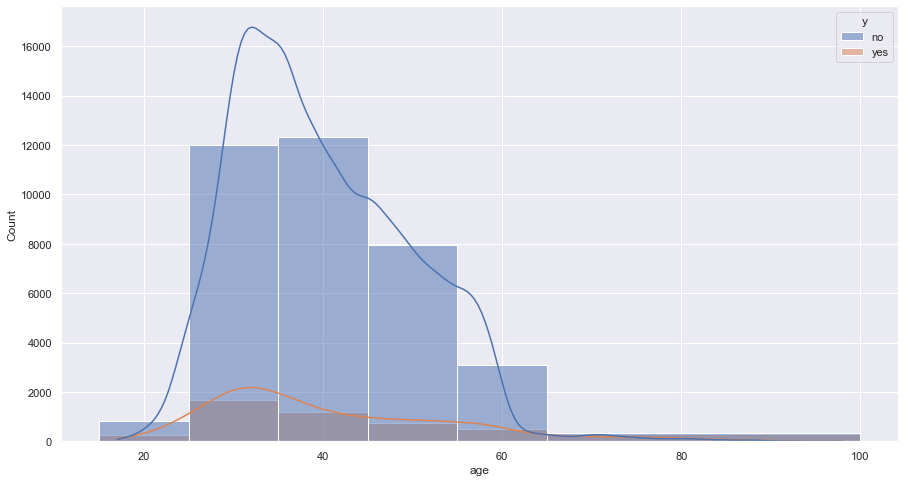

In [19]:
sns.histplot(full_exp, x='age', hue='y',stat='count', bins = [15,25,35,45,55,65,100], kde=True)

In [20]:
full_exp['age'].describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

<AxesSubplot:xlabel='campaign', ylabel='Count'>

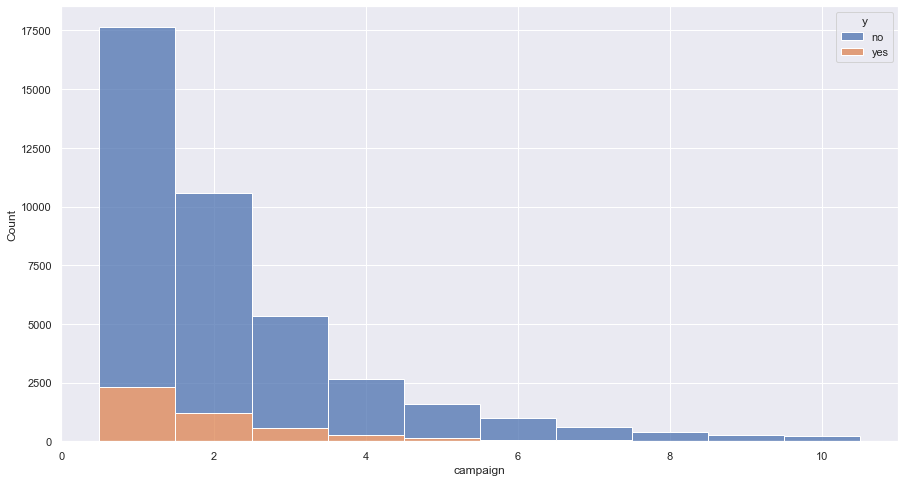

In [21]:
#sns.catplot(data=full_exp, x='campaign', col='y',kind='count', height = 7, aspect=.9)
sns.histplot(full_exp[full_exp['campaign']<=10], x='campaign', hue='y',stat='count', discrete=True, multiple="stack")

In [22]:
x=full_exp[full_exp['campaign']<=10].groupby(['campaign','y']).size()
x.groupby(level=0).apply(lambda x:  100 * x / float(x.sum()))

campaign  y  
1         no     86.962929
          yes    13.037071
2         no     88.543046
          yes    11.456954
3         no     89.252949
          yes    10.747051
4         no     90.607318
          yes     9.392682
5         no     92.495310
          yes     7.504690
6         no     92.339122
          yes     7.660878
7         no     93.958665
          yes     6.041335
8         no     95.750000
          yes     4.250000
9         no     93.992933
          yes     6.007067
10        no     94.666667
          yes     5.333333
dtype: float64

**Observation:**
general pattern here is as contact # increases sub% is also decreasing, confirming that # contact does not increase your success rate **

<AxesSubplot:xlabel='pdays', ylabel='Count'>

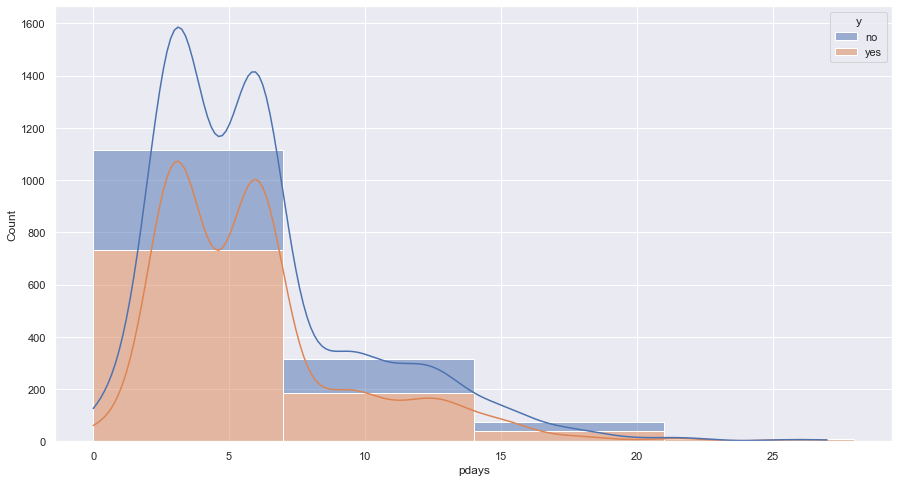

In [23]:
sns.histplot(full_exp[full_exp['pdays']<999], x='pdays', hue='y',stat='count', multiple="stack",binwidth=7,kde=True)

**Observation:**

majority of the customers were contacted within 14 days since last campaign (of those that were contacted)

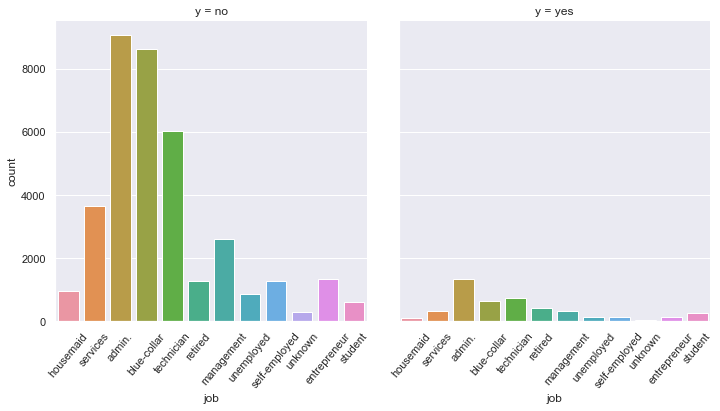

In [304]:
#job & sub 
sns.set(rc = {'figure.figsize':(15,10)})
sns.catplot(data=full_exp, x='job', col='y',kind="count").set_xticklabels(rotation=50)

### Data Cleaning

First thing first.. some of the column names doesn't make sense intuitively to me, so to make thing easier to understand i will clean up the column names

In [3]:
clean_data = full.copy()
clean_data.rename(columns={'housing':'housing_loan',
                          'loan':'personal_loan',
                          'contact':'contact_method',
                          'campaign':'num_contact_current',
                          'pdays':'days_since_previous',
                          'previous':'num_contact_previous',
                          'poutcome':'outcome_previous',},inplace = True)

___

**Outliers**

During our data exploration we noticed that num_contact_current (campaign) and duration had very high max values. it could be bad data that should be excluded

<AxesSubplot:>

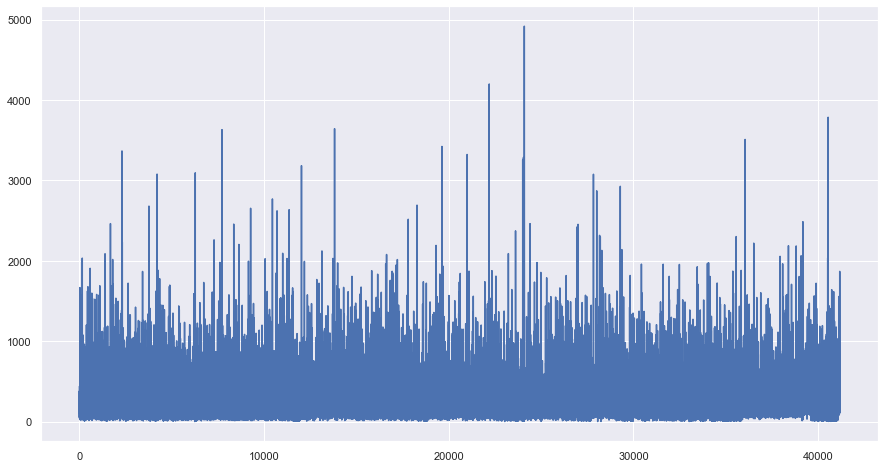

In [25]:
clean_data['duration'].plot()

having a quick look at the plot, doesnt seem like the 4918sec conversation is bad data. at least nothing indicative here..

now doing the same for campaign column

<AxesSubplot:>

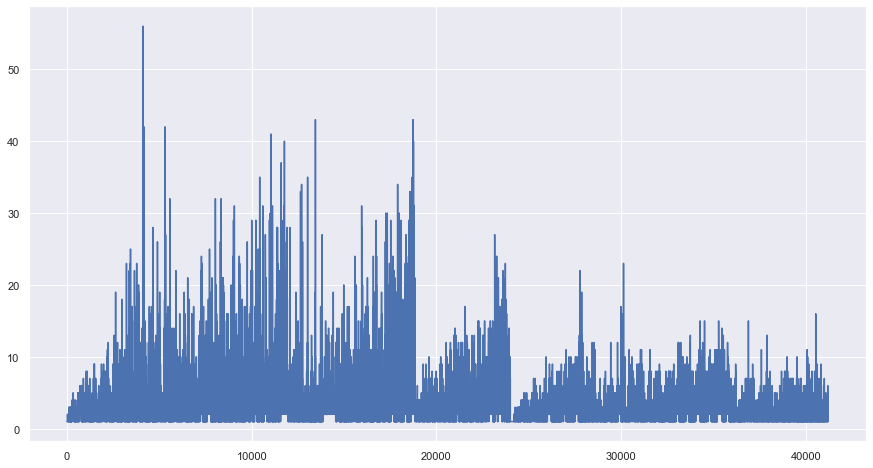

In [26]:
clean_data['num_contact_current'].plot()

Again, 56 contacts is odd. but doesn't seem to be bad data since we have a couple records in 30s and 40s

**Outliers doesn't seem to be a problem for duration and campaign, so we will keep the data set as is**

___

**Duplicated Values**

next we will see if there are duplicated values in the data set that should be removed

In [4]:
len(clean_data[clean_data.duplicated()])

12

seems like we have 12 duplicates. usually data set will have customer identifier so we know these are real duplicates and not just same value by chance. for the purpose of this project we are going to assume they are different customers and they are legitimate duplicated values

In [5]:
clean_data.drop_duplicates(keep='first', inplace=True)

___

**Incorrect Data**

During out exploration step, we noticed that when outcome_previous (poutcome) = 'failure, it still had pady = 999. this doesn't mean sense since 999 indicated that they've never been contacted before

In [6]:
clean_data[clean_data['days_since_previous'] ==999].groupby(['outcome_previous'])['days_since_previous'].describe()

,count,mean,std,min,25%,50%,75%,max
outcome_previous,,,,,,,,
failure,4110.0,999.0,0.0,999.0,999.0,999.0,999.0,999.0
nonexistent,35551.0,999.0,0.0,999.0,999.0,999.0,999.0,999.0


This seems like there's quite a bit of 999. it most likely is incorrect/missing value

A couple ways we can tackle this:<br>
- fill with NaN
- fill with med
- fill with mean
- impute data

After consulting with the market managers they have indicated that we should just fill all these values with 14

In [8]:
clean_data['days_since_previous'] = np.where((clean_data['outcome_previous'] == 'failure') & (clean_data['days_since_previous'] == 999),14,clean_data['days_since_previous'])

#sanity check
clean_data.groupby(['outcome_previous'])['days_since_previous'].describe()

,count,mean,std,min,25%,50%,75%,max
outcome_previous,,,,,,,,
failure,4252.0,13.871119,1.052534,3.0,14.0,14.0,14.0,25.0
nonexistent,35551.0,999.000000,0.000000,999.0,999.0,999.0,999.0,999.0
success,1373.0,5.587764,3.501007,0.0,3.0,5.0,6.0,27.0


___

### Data Processing

we will now change some of the column into a format that makes more sense based on our observation during data exploration

1. we will change the age into bucket. based on what we saw seems like 10 increment is a good start up until age 65

In [13]:
#breaking up age into buckets

def age_bucket(row):
    if row['age'] <= 24:
        return '<24'
    elif (row['age'] >= 25 and row['age'] <= 34):
        return '25-34'
    elif (row['age'] >= 35 and row['age'] <= 44):
        return '35-44'
    elif (row['age'] >= 45 and row['age'] <= 54):
        return '45-54'
    elif (row['age'] >= 55 and row['age'] <= 64):
        return '55-64'
    elif row['age'] >= 65:
        return '65+'

In [14]:
clean_data['age_bucket'] = clean_data.apply(age_bucket,axis=1)

#sanity check
clean_data.groupby(['age_bucket']).size()

age_bucket
25-34    13684
35-44    13495
45-54     8702
55-64     3566
65+        662
<24       1067
dtype: int64

Now let's try the same plot with our new bucket

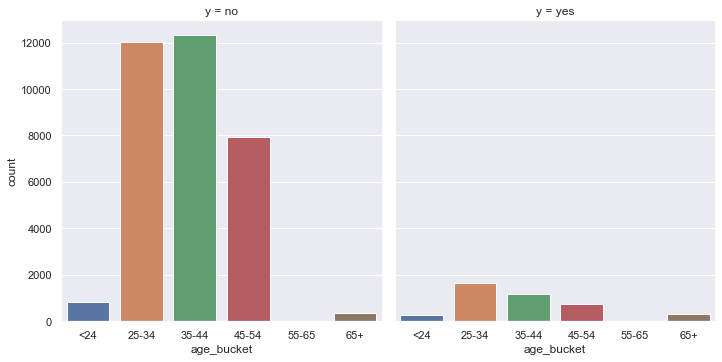

In [33]:
sns.catplot(data=clean_data, x='age_bucket', col='y',kind="count", order= ['<24','25-34','35-44','45-54','55-65','65+'])

this looks good, seems like we have a higher % of those in 25-34 in the yes group **

2. we will change days_since_previous also to something more meaningful

In [15]:
def pdays_bucket(row):
    if row['days_since_previous'] <= 7:
        return '1 week ago'
    elif (row['days_since_previous'] >= 8 and row['days_since_previous'] <= 14):
        return '2 weeks ago'
    elif (row['days_since_previous'] >= 15 and row['days_since_previous'] <= 21):
        return '3 weeks ago'
    elif (row['days_since_previous'] >= 22 and row['days_since_previous'] <= 28):
        return '4 weeks ago'
    elif (row['days_since_previous'] >= 28 and row['days_since_previous'] < 999):
        return 'over 1 month ago'
    elif row['days_since_previous'] == 999:
        return 'never contacted'

In [16]:
clean_data['time_since_previous_contact'] = clean_data.apply(pdays_bucket,axis=1)

#sanity check
clean_data.groupby(['time_since_previous_contact']).size()

time_since_previous_contact
1 week ago          1177
2 weeks ago         4386
3 weeks ago           56
4 weeks ago            6
never contacted    35551
dtype: int64

**Transforming columns**

Will be using one hot encoding to transform some of the categorical columns and will be dropping all where values is unknown

In [102]:
clean_data.select_dtypes(include=['object']).columns.tolist()

['job',
 'marital',
 'education',
 'default',
 'housing_loan',
 'personal_loan',
 'contact_method',
 'month',
 'day_of_week',
 'outcome_previous',
 'y',
 'age_bucket',
 'time_since_previous_contact']

I'm going to exclude a few columns like month and day_of_week. while I believe when a campaign is ran and when a customer is contacted can be a factor in customer subbing or not. but i dont believe it is a good variable to explain customer behaviour and their likelihood to sub in the future

In [17]:
#first create a copy with all variables
#remove duration because it is highly correlated
#also removing age and days_since_previous because we've already created columns for them
clean_data_allvar = clean_data.drop(columns = ['duration','age','days_since_previous'])

excl_col = ['duration','default','month','day_of_week','age','days_since_previous']
clean_data.drop(columns=excl_col, inplace=True)

In [18]:
#reusing variable define above to get all categorical variable + whatever is missing
cat_cols = clean_data.select_dtypes(include=['object']).columns.tolist()
cat_cols_allvar = clean_data_allvar.select_dtypes(include=['object']).columns.tolist()
#removing our target variable
cat_cols.remove('y')
cat_cols_allvar.remove('y')

In [19]:
clean_data = pd.get_dummies(clean_data, columns=cat_cols)
clean_data_allvar = pd.get_dummies(clean_data_allvar, columns=cat_cols_allvar)

In [20]:
#removing columns that won't make sense in explaining our results
#we will keep all columns for the allvar version to compare results
excl_col_ohe = ['job_unknown','marital_unknown','education_unknown','housing_loan_unknown','personal_loan_unknown','education_illiterate']

clean_data.drop(columns=excl_col_ohe, inplace=True)

In [169]:
clean_data_allvar.head()

,num_contact_current,num_contact_previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,housing_loan_no,housing_loan_unknown,housing_loan_yes,personal_loan_no,personal_loan_unknown,personal_loan_yes,contact_method_cellular,contact_method_telephone,outcome_previous_failure,outcome_previous_nonexistent,outcome_previous_success,age_bucket_25-34,age_bucket_35-44,age_bucket_45-54,age_bucket_55-64,age_bucket_65+,age_bucket_<24,time_since_previous_contact_1 week ago,time_since_previous_contact_2 weeks ago,time_since_previous_contact_3 weeks ago,time_since_previous_contact_4 weeks ago,time_since_previous_contact_never contacted,default_no,default_unknown,default_yes,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,1,0,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,1,0,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,1,0,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,1,0,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,1,0,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [149]:
print(clean_data.shape)
print(clean_data_allvar.shape)

(41176, 48)
(41176, 57)


___

### Modelling

First we will beign with logistic regression, we will start by creating the dataset for logistic regression

In [27]:
#define target and indepent variables
X = clean_data[clean_data.columns.difference(['y'])]
y = clean_data['y']
X_all = clean_data_allvar[clean_data_allvar.columns.difference(['y'])]
y_all = clean_data_allvar['y']

**Dealing with imbalanced data**

As we have observed previously, only around 11% of our data set contain y = 'yes', making the dataset quite imbalanced. We will be using SMOTE to combat this.

we will also be comparing the results of the original dataset vs the result after oversampling

In [37]:
oversmaple = imblearn.over_sampling.SMOTE()
X_os, y_os = oversmaple.fit_resample(X,y)
X_os_all, y_os_all = oversmaple.fit_resample(X_all,y_all)
print(y.value_counts('yes'))
print(y_os.value_counts('yes'))

no     0.887337
yes    0.112663
Name: y, dtype: float64
no     0.5
yes    0.5
Name: y, dtype: float64


We can see that after applying SMOTE, the new data set has equal number of yes and no. now we will move on to fitting our data to the logistic regression and decision tree models and compare the results

In [39]:
#split into train and test set. stratified on y
train_X, test_X, train_y, test_y = model_selection.train_test_split(X, y, test_size = 0.3, random_state = 3, stratify = y)
train_X_all , test_X_all , train_y_all , test_y_all  = model_selection.train_test_split(X_all , y_all , test_size = 0.3, random_state = 3, stratify = y)

In [41]:
#split our oversampling data into train and test
train_X_os, test_X_os, train_y_os, test_y_os = model_selection.train_test_split(X_os, y_os, test_size = 0.3, random_state = 3)
train_X_os_all , test_X_os_all , train_y_os_all , test_y_os_all  = model_selection.train_test_split(X_os_all , y_os_all , test_size = 0.3, random_state = 3)

In [42]:
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)
print(train_X_all.shape)
print(train_y_all.shape)
print(test_X_all.shape)
print(test_y_all.shape)
print(train_X_os.shape)
print(train_y_os.shape)
print(test_X_os.shape)
print(test_y_os.shape)
print(train_X_os_all.shape)
print(train_y_os_all.shape)
print(test_X_os_all.shape)
print(test_y_os_all.shape)

(28823, 47)
(28823,)
(12353, 47)
(12353,)
(28823, 71)
(28823,)
(12353, 71)
(12353,)
(51151, 47)
(51151,)
(21923, 47)
(21923,)
(51151, 71)
(51151,)
(21923, 71)
(21923,)


In [44]:
print(train_y.value_counts('yes'))
print(test_y.value_counts('yes'))
print(train_y_all.value_counts('yes'))
print(test_y_all.value_counts('yes'))
print(train_y_os.value_counts('yes'))
print(test_y_os.value_counts('yes'))
print(train_y_os_all.value_counts('yes'))
print(test_y_os_all.value_counts('yes'))

no     0.887347
yes    0.112653
Name: y, dtype: float64
no     0.887315
yes    0.112685
Name: y, dtype: float64
no     0.887347
yes    0.112653
Name: y, dtype: float64
no     0.887315
yes    0.112685
Name: y, dtype: float64
no     0.502786
yes    0.497214
Name: y, dtype: float64
yes    0.5065
no     0.4935
Name: y, dtype: float64
no     0.502786
yes    0.497214
Name: y, dtype: float64
yes    0.5065
no     0.4935
Name: y, dtype: float64


In [48]:
#define model
model_lr = linear_model.LogisticRegression(solver='liblinear')
model_lr_all = linear_model.LogisticRegression(solver='liblinear')
model_lr_os = linear_model.LogisticRegression(solver='liblinear')
model_lr_os_all = linear_model.LogisticRegression(solver='liblinear')

In [54]:
#fit to original data set
model_lr.fit(train_X,train_y)
model_lr_all.fit(train_X_all,train_y_all)
print(model_lr.score(train_X,train_y))
print(model_lr_all.score(train_X_all,train_y_all))
print(model_lr.score(test_X,test_y))
print(model_lr_all.score(test_X_all,test_y_all))

0.8996634632064671
0.9006696041355862
0.8975957257346393
0.8995385736258399


In [55]:
#fit to oversample data set
model_lr_os.fit(train_X_os,train_y_os)
model_lr_os_all.fit(train_X_os_all,train_y_os_all)
print(model_lr_os.score(train_X_os,train_y_os))
print(model_lr_os_all.score(train_X_os_all,train_y_os_all))
print(model_lr_os.score(test_X_os,test_y_os))
print(model_lr_os_all.score(test_X_os_all,test_y_os_all))

0.8777541006040938
0.9342339348204336
0.8791679970806915
0.9339050312457237


In [56]:
#coef on orginal data set of subset variables
coef_table1 = pd.DataFrame({"Features": list(train_X.columns)}).copy()
coef_table1.insert(len(coef_table1.columns),"coefs",model_lr.coef_.transpose())
coef_table1['abs'] = coef_table1['coefs'].abs()
coef_table1['+/-'] = np.where(coef_table1['coefs'] >0, 'positive','negative')
coef_table1.sort_values(by=['abs'],ascending = False).head(10)

,Features,coefs,abs,+/-
39,outcome_previous_success,0.518688,0.518688,positive
37,outcome_previous_failure,-0.452854,0.452854,negative
7,cons.price.idx,0.441355,0.441355,positive
42,time_since_previous_contact_1 week ago,0.414144,0.414144,positive
8,contact_method_cellular,0.376299,0.376299,positive
9,contact_method_telephone,-0.374187,0.374187,negative
43,time_since_previous_contact_2 weeks ago,-0.355824,0.355824,negative
1,age_bucket_35-44,-0.202892,0.202892,negative
16,emp.var.rate,-0.201366,0.201366,negative
21,job_blue-collar,-0.200513,0.200513,negative


In [59]:
#coef on orginal data set of all variables
coef_table2 = pd.DataFrame({"Features": list(train_X_all.columns)}).copy()
coef_table2.insert(len(coef_table2.columns),"coefs",model_lr_all.coef_.transpose())
coef_table2['abs'] = coef_table2['coefs'].abs()
coef_table2['+/-'] = np.where(coef_table2['coefs'] >0, 'positive','negative')
coef_table2.sort_values(by=['abs'],ascending = False).head(10)

,Features,coefs,abs,+/-
53,month_may,-0.644012,0.644012,negative
62,outcome_previous_success,0.632821,0.632821,positive
60,outcome_previous_failure,-0.530241,0.530241,negative
66,time_since_previous_contact_1 week ago,0.466600,0.466600,positive
52,month_mar,0.422452,0.422452,positive
67,time_since_previous_contact_2 weeks ago,-0.367590,0.367590,negative
7,cons.price.idx,0.335840,0.335840,positive
26,emp.var.rate,-0.279899,0.279899,negative
50,month_jul,0.270095,0.270095,positive
11,day_of_week_mon,-0.244014,0.244014,negative


In [102]:
#coef on oversample data set of subset variables
coef_table2 = pd.DataFrame({"Features": list(train_X_os.columns)}).copy()
coef_table2.insert(len(coef_table2.columns),"coefs",model_lr_os.coef_.transpose())
coef_table2['abs'] = coef_table2['coefs'].abs()
coef_table2['+/-'] = np.where(coef_table2['coefs'] >0, 'positive','negative')
coef_table2.sort_values(by=['abs'],ascending = False)

,Features,coefs,abs,+/-
3,age_bucket_55-64,-5.839009,5.839009,negative
2,age_bucket_45-54,-5.668682,5.668682,negative
5,age_bucket_<24,-5.453686,5.453686,negative
1,age_bucket_35-44,-5.453169,5.453169,negative
9,contact_method_telephone,-5.173988,5.173988,negative
0,age_bucket_25-34,-5.161076,5.161076,negative
4,age_bucket_65+,-4.937629,4.937629,negative
31,marital_divorced,-4.656592,4.656592,negative
32,marital_married,-4.236981,4.236981,negative
33,marital_single,-4.232533,4.232533,negative


In [58]:
#coef on oversample data set of all variables
coef_table2 = pd.DataFrame({"Features": list(train_X_os_all.columns)}).copy()
coef_table2.insert(len(coef_table2.columns),"coefs",model_lr_os_all.coef_.transpose())
coef_table2['abs'] = coef_table2['coefs'].abs()
coef_table2['+/-'] = np.where(coef_table2['coefs'] >0, 'positive','negative')
coef_table2.sort_values(by=['abs'],ascending = False).head(10)

,Features,coefs,abs,+/-
11,day_of_week_mon,-5.161301,5.161301,negative
10,day_of_week_fri,-4.978793,4.978793,negative
13,day_of_week_tue,-4.974088,4.974088,negative
12,day_of_week_thu,-4.889731,4.889731,negative
14,day_of_week_wed,-4.787696,4.787696,negative
28,housing_loan_no,-4.223938,4.223938,negative
30,housing_loan_yes,-4.203055,4.203055,negative
1,age_bucket_35-44,-4.034838,4.034838,negative
20,education_basic.9y,-4.028580,4.028580,negative
2,age_bucket_45-54,-4.020240,4.020240,negative


In [339]:
#validation of logistic regression on orginal data set with all variable
#for all variables
y_pred_lr = model_lr_all.predict(test_X_all)
y_actual_lr = test_y_all

#results = metrics.precision_recall_fscore_support(y_actual_lr, y_pred_lr, average = 'macro')
results = metrics.precision_recall_fscore_support(y_actual_lr, y_pred_lr, average = 'binary', pos_label = 'yes')
accuracy = metrics.accuracy_score(y_actual_lr,y_pred_lr)
precision = results[0]
recall = results[1]
fscore = results[2]

print('precision: ' + str(precision))
print('recall: ' + str(recall))
print('fscore: ' + str(fscore))
print('accuracy: ' + str(accuracy))

precision: 0.665929203539823
recall: 0.21623563218390804
fscore: 0.3264642082429501
accuracy: 0.8994576216303732


In [61]:
#validation of logistic regression on orginal data set with subset variable
y_pred_lr = model_lr.predict(test_X)
y_actual_lr = test_y

results = metrics.precision_recall_fscore_support(y_actual_lr, y_pred_lr, average = 'binary', pos_label = 'yes')
accuracy = metrics.accuracy_score(y_actual_lr,y_pred_lr)
precision = results[0]
recall = results[1]
fscore = results[2]

print('precision: ' + str(precision))
print('recall: ' + str(recall))
print('fscore: ' + str(fscore))
print('accuracy: ' + str(accuracy))

precision: 0.6383442265795207
recall: 0.21048850574712644
fscore: 0.3165856293895192
accuracy: 0.8975957257346393


In [63]:
#validation of logistic regression on oversample data set with all variable
#for all variables
y_pred_lr = model_lr_os_all.predict(test_X_os_all)
y_actual_lr = test_y_os_all

#results = metrics.precision_recall_fscore_support(y_actual_lr, y_pred_lr, average = 'macro')
results = metrics.precision_recall_fscore_support(y_actual_lr, y_pred_lr, average = 'binary', pos_label = 'yes')
accuracy = metrics.accuracy_score(y_actual_lr,y_pred_lr)
precision = results[0]
recall = results[1]
fscore = results[2]

print('precision: ' + str(precision))
print('recall: ' + str(recall))
print('fscore: ' + str(fscore))
print('accuracy: ' + str(accuracy))

precision: 0.9747271118104042
recall: 0.8926512968299711
fscore: 0.9318854886475815
accuracy: 0.9339050312457237


In [64]:
#validation of logistic regression on oversample data set with subset variable
#for all variables
y_pred_lr = model_lr_os.predict(test_X_os)
y_actual_lr = test_y_os

#results = metrics.precision_recall_fscore_support(y_actual_lr, y_pred_lr, average = 'macro')
results = metrics.precision_recall_fscore_support(y_actual_lr, y_pred_lr, average = 'binary', pos_label = 'yes')
accuracy = metrics.accuracy_score(y_actual_lr,y_pred_lr)
precision = results[0]
recall = results[1]
fscore = results[2]

print('precision: ' + str(precision))
print('recall: ' + str(recall))
print('fscore: ' + str(fscore))
print('accuracy: ' + str(accuracy))

precision: 0.9223698671195923
recall: 0.8314121037463977
fscore: 0.874532278690854
accuracy: 0.8791679970806915


**Decision Tree**

In [96]:
model_dt = tree.DecisionTreeClassifier(max_depth=15)
model_dt_all = tree.DecisionTreeClassifier(max_depth=15)
model_dt_os = tree.DecisionTreeClassifier(max_depth=33)
model_dt_os_all = tree.DecisionTreeClassifier(max_depth=33)

In [97]:
#fit original dataset
model_dt.fit(train_X,train_y)
model_dt_all.fit(train_X_all,train_y_all)
print(model_dt.score(train_X,train_y))
print(model_dt_all.score(train_X_all,train_y_all))
print(model_dt.score(test_X,test_y))
print(model_dt_all.score(test_X_all,test_y_all))

0.9383131526905596
0.9407417687263644
0.8851291184327693
0.8822148465959686


In [86]:
#fit oversampling dataset
model_dt_os.fit(train_X_os,train_y_os)
model_dt_os_all.fit(train_X_os_all,train_y_os_all)
print(model_dt_os.score(train_X_os,train_y_os))
print(model_dt_os_all.score(train_X_os_all,train_y_os_all))
print(model_dt_os.score(test_X_os,test_y_os))
print(model_dt_os_all.score(test_X_os_all,test_y_os_all))

0.9900295204394831
0.9943305116224511
0.8944943666469005
0.9032066779181681


In [87]:
#feature importance for decision tree on original data with subset variable
coef_table3 = pd.DataFrame({"Features": list(train_X.columns)}).copy()
coef_table3.insert(len(coef_table3.columns),"feature_importance",model_dt.feature_importances_.transpose())
coef_table3.sort_values(by=['feature_importance'],ascending = False).head(10)

,Features,feature_importance
34,nr.employed,0.317162
17,euribor3m,0.141290
6,cons.conf.idx,0.059910
35,num_contact_current,0.057663
39,outcome_previous_success,0.057345
1,age_bucket_35-44,0.018079
18,housing_loan_no,0.016670
13,education_high.school,0.016238
36,num_contact_previous,0.015651
20,job_admin.,0.015400


In [88]:
#feature importance for decision tree on original data with all variable
coef_table4 = pd.DataFrame({"Features": list(train_X_all.columns)}).copy()
coef_table4.insert(len(coef_table4.columns),"feature_importance",model_dt_all.feature_importances_.transpose())
coef_table4.sort_values(by=['feature_importance'],ascending = False).head(10)

,Features,feature_importance
57,nr.employed,0.303099
27,euribor3m,0.097941
62,outcome_previous_success,0.054724
58,num_contact_current,0.051888
6,cons.conf.idx,0.034923
1,age_bucket_35-44,0.016333
59,num_contact_previous,0.016008
31,job_admin.,0.015657
28,housing_loan_no,0.015259
11,day_of_week_mon,0.015145


In [70]:
#feature importance for decision tree on oversample data with subset variable
coef_table3 = pd.DataFrame({"Features": list(train_X_os.columns)}).copy()
coef_table3.insert(len(coef_table3.columns),"feature_importance",model_dt_os.feature_importances_.transpose())
coef_table3.sort_values(by=['feature_importance'],ascending = False).head(10)

,Features,feature_importance
34,nr.employed,0.296794
17,euribor3m,0.214233
6,cons.conf.idx,0.099874
3,age_bucket_55-64,0.033171
7,cons.price.idx,0.031212
9,contact_method_telephone,0.024708
35,num_contact_current,0.023086
5,age_bucket_<24,0.021334
32,marital_married,0.020615
8,contact_method_cellular,0.018937


In [90]:
#feature importance for decision tree on oversample data with all variable
coef_table4 = pd.DataFrame({"Features": list(train_X_os_all.columns)}).copy()
coef_table4.insert(len(coef_table4.columns),"feature_importance",model_dt_os_all.feature_importances_.transpose())
coef_table4.sort_values(by=['feature_importance'],ascending = False).head(10)

,Features,feature_importance
57,nr.employed,0.205721
27,euribor3m,0.158927
6,cons.conf.idx,0.050209
58,num_contact_current,0.043843
3,age_bucket_55-64,0.034473
13,day_of_week_tue,0.021940
0,age_bucket_25-34,0.021589
28,housing_loan_no,0.021532
12,day_of_week_thu,0.020938
9,contact_method_telephone,0.020867


In [99]:
#validation of decision tree on orginal data set with all variable
y_pred_dt = model_dt_all.predict(test_X_all)
y_actual_dt = test_y_all

results = metrics.precision_recall_fscore_support(y_actual_dt, y_pred_dt, average = 'binary', pos_label = 'yes')
accuracy = metrics.accuracy_score(y_actual_dt,y_pred_dt)
precision = results[0]
recall = results[1]
fscore = results[2]

print('precision: ' + str(precision))
print('recall: ' + str(recall))
print('fscore: ' + str(fscore))
print('accuracy: ' + str(accuracy))

precision: 0.46153846153846156
recall: 0.27155172413793105
fscore: 0.34192672998643153
accuracy: 0.8822148465959686


In [92]:
#validation of decision tree on orginal data set with subset variable
y_pred_dt = model_dt.predict(test_X)
y_actual_dt = test_y

#results = metrics.precision_recall_fscore_support(y_actual_dt, y_pred_dt, average = 'macro')
results = metrics.precision_recall_fscore_support(y_actual_dt, y_pred_dt, average = 'binary', pos_label = 'yes')
accuracy = metrics.accuracy_score(y_actual_dt,y_pred_dt)
precision = results[0]
recall = results[1]
fscore = results[2]

print('precision: ' + str(precision))
print('recall: ' + str(recall))
print('fscore: ' + str(fscore))
print('accuracy: ' + str(accuracy))

precision: 0.4905913978494624
recall: 0.26221264367816094
fscore: 0.34176029962546817
accuracy: 0.8861814943738363


In [93]:
#validation of decision tree on oversample data set with all variable
y_pred_dt = model_dt_os_all.predict(test_X_os_all)
y_actual_dt = test_y_os_all

results = metrics.precision_recall_fscore_support(y_actual_dt, y_pred_dt, average = 'binary', pos_label = 'yes')
accuracy = metrics.accuracy_score(y_actual_dt,y_pred_dt)
precision = results[0]
recall = results[1]
fscore = results[2]

print('precision: ' + str(precision))
print('recall: ' + str(recall))
print('fscore: ' + str(fscore))
print('accuracy: ' + str(accuracy))

precision: 0.8987746403835908
recall: 0.9115634005763689
fscore: 0.9051238486989179
accuracy: 0.9032066779181681


In [94]:
#validation of decision tree on oversamle data set with subset variable
y_pred_dt = model_dt_os.predict(test_X_os)
y_actual_dt = test_y_os

results = metrics.precision_recall_fscore_support(y_actual_dt, y_pred_dt, average = 'binary', pos_label = 'yes')
accuracy = metrics.accuracy_score(y_actual_dt,y_pred_dt)
precision = results[0]
recall = results[1]
fscore = results[2]

print('precision: ' + str(precision))
print('recall: ' + str(recall))
print('fscore: ' + str(fscore))
print('accuracy: ' + str(accuracy))

precision: 0.892000356728797
recall: 0.9007564841498559
fscore: 0.8963570372361876
accuracy: 0.8944943666469005


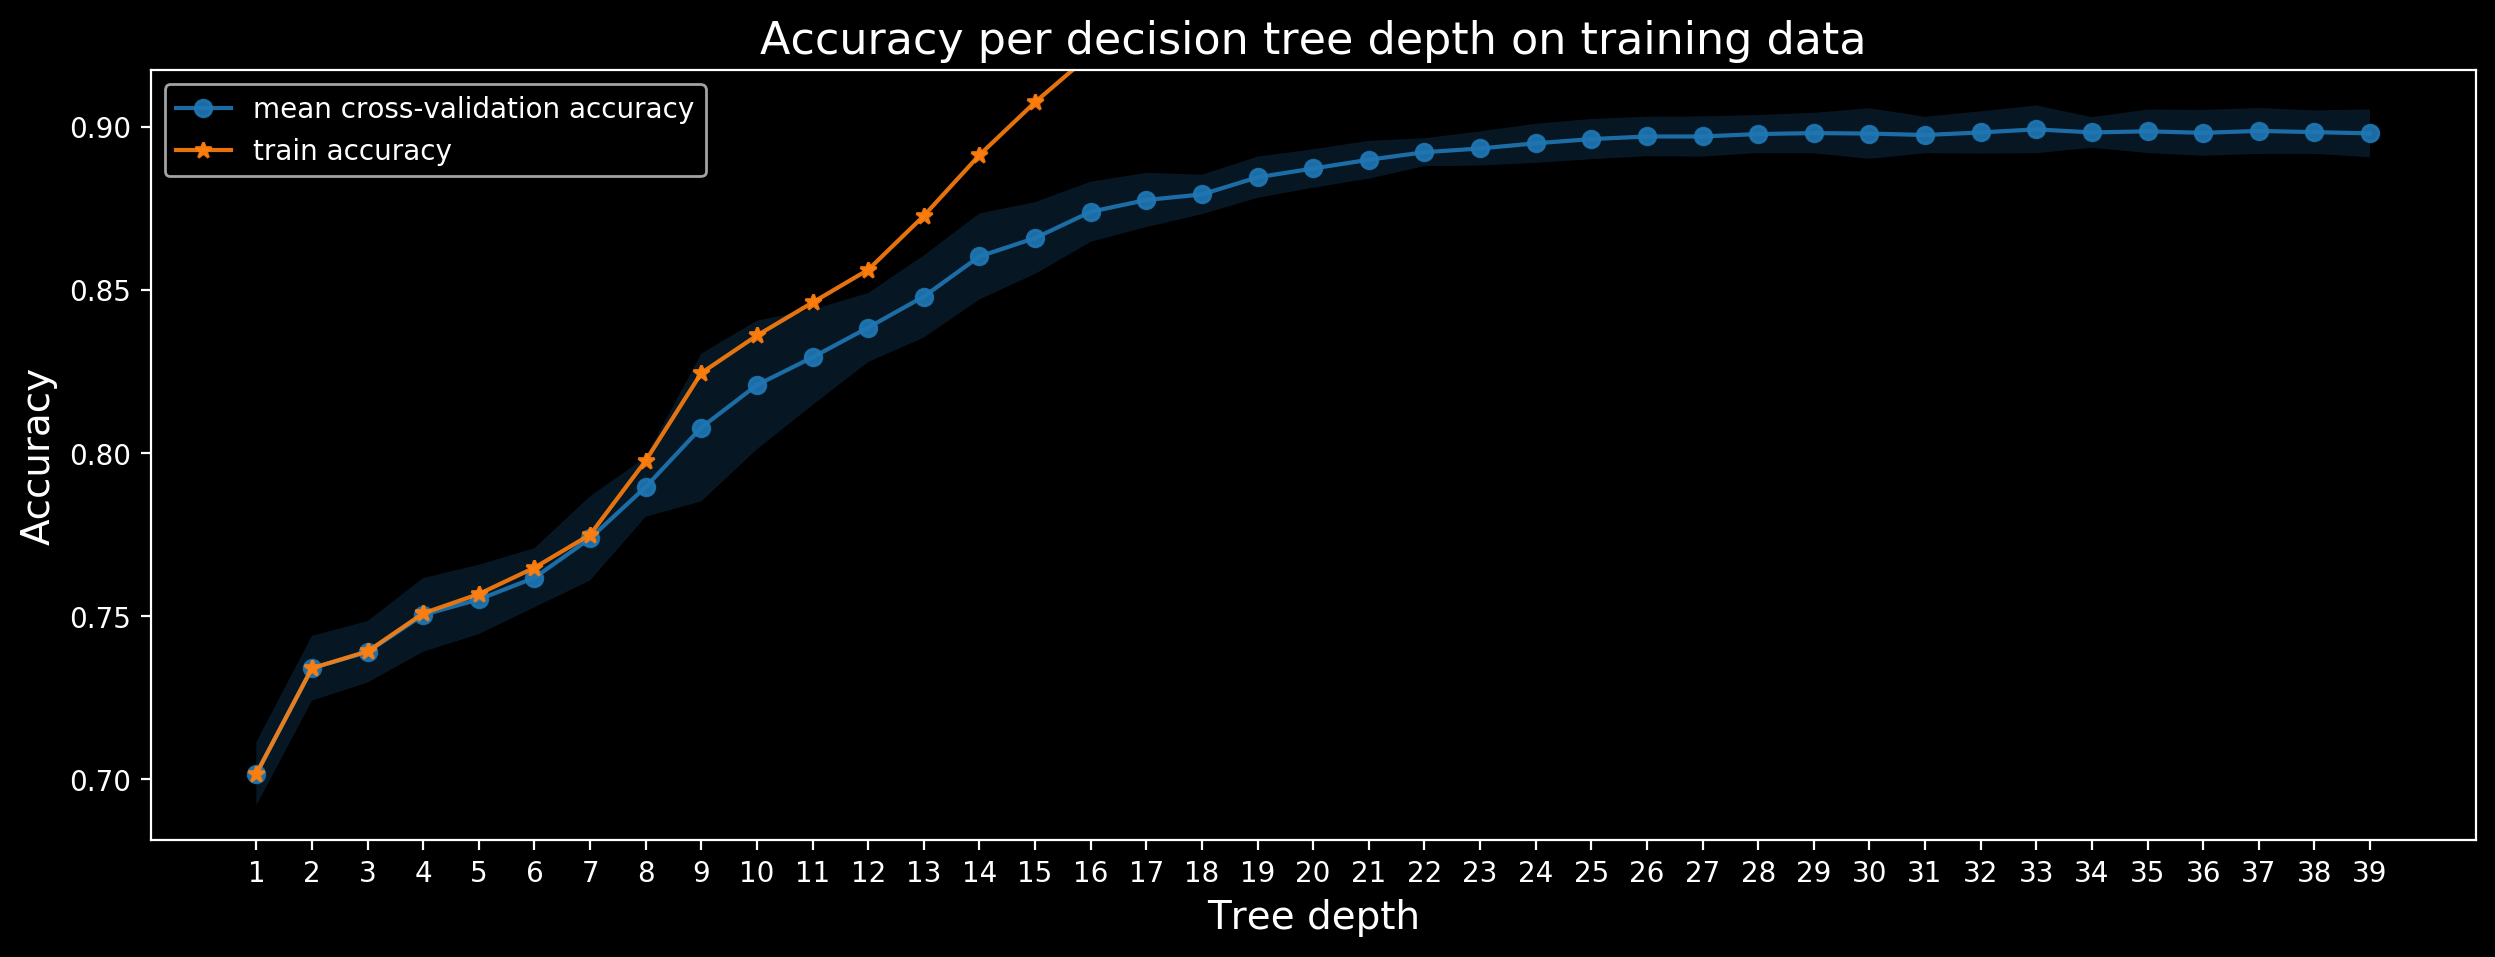

In [78]:
#cross validation

# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=10, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = tree.DecisionTreeClassifier(max_depth=depth)
        cv_scores = model_selection.cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
sm_tree_depths = range(1,40)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(train_X_os_all, train_y_os_all, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')


    
 

In [79]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

The depth-33 tree achieves the best mean cross-validation accuracy 89.93177 +/- 0.36612% on training dataset


>1, train: 0.887, test: 0.887, avg: 0.887331, diff: -0.000016, 0.000016
>2, train: 0.899, test: 0.899, avg: 0.899248, diff: -0.000034, 0.000034
>3, train: 0.899, test: 0.899, avg: 0.899248, diff: -0.000034, 0.000034
>4, train: 0.900, test: 0.899, avg: 0.899323, diff: -0.000756, 0.000756
>5, train: 0.903, test: 0.898, avg: 0.900798, diff: -0.002474, 0.002474
>6, train: 0.905, test: 0.898, avg: 0.901353, diff: -0.003272, 0.003272
>7, train: 0.907, test: 0.895, avg: 0.901220, diff: -0.005729, 0.005729
>8, train: 0.909, test: 0.894, avg: 0.901758, diff: -0.007481, 0.007481
>9, train: 0.913, test: 0.895, avg: 0.904019, diff: -0.008690, 0.008690
>10, train: 0.916, test: 0.895, avg: 0.905621, diff: -0.010696, 0.010696
>11, train: 0.920, test: 0.893, avg: 0.906413, diff: -0.013269, 0.013269
>12, train: 0.924, test: 0.892, avg: 0.907945, diff: -0.015935, 0.015935
>13, train: 0.928, test: 0.890, avg: 0.908963, diff: -0.019462, 0.019462
>14, train: 0.934, test: 0.889, avg: 0.911311, diff: -0.0222

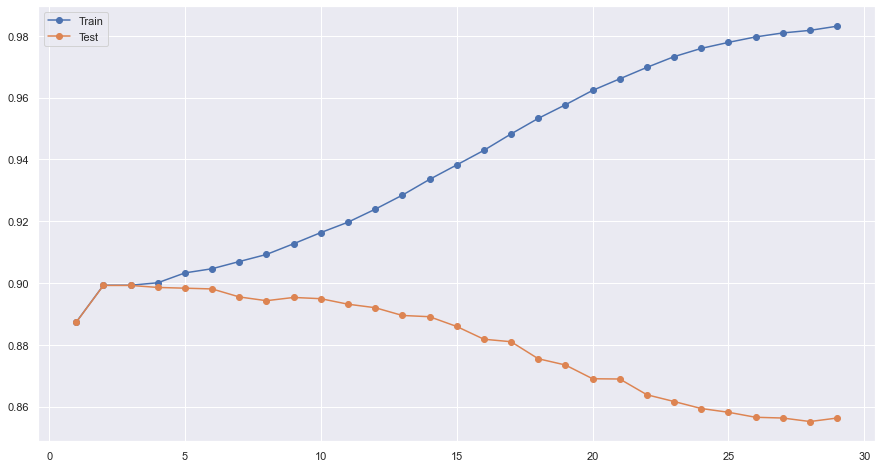

In [282]:
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 30)]
# evaluate a decision tree for each depth
X_train=train_X
y_train=train_y

X_test =test_X
y_test = test_y


for i in values:
    # configure the model
    model = tree.DecisionTreeClassifier(max_depth=i)
    # fit model on the training dataset
    model.fit(X_train, y_train)
    # evaluate on the train dataset
    train_yhat = model.predict(X_train)
    train_acc = metrics.accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_yhat = model.predict(X_test)
    test_acc = metrics.accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    # summarize progress
    avg = (train_acc+test_acc)/2
    train_dff = avg-train_acc
    test_diff = avg-test_acc

    print('>%d, train: %.3f, test: %.3f, avg: %3f, diff: %3f, %3f' % (i, train_acc, test_acc,avg,train_dff,test_diff))
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()


Next we will model using decision tree, similar to logistic regressino, we will define the dataset for decision tree

Confusion Matrix


| |y|n|
|-|-|-|
|y|301 (TP)|151 (FP)|
|n|1091 (FN)|10810 (TN)|
logistic regression (all)

| |y|n|
|-|-|-|
|y|291 (TP)|159 (FP)|
|n|1101 (FN)|10802 (TN)|
<br>
logistic regression (subset)

| |y|n|
|-|-|-|
|y|384 (TP)|294 (FP)|
|n|1008 (FN)|10667 (TN)|
decision tree (all)

| |y|n|
|-|-|-|
|y|365 (TP)|278 (FP)|
|n|1027 (FN)|10683 (TN)|
decision tree (subset)

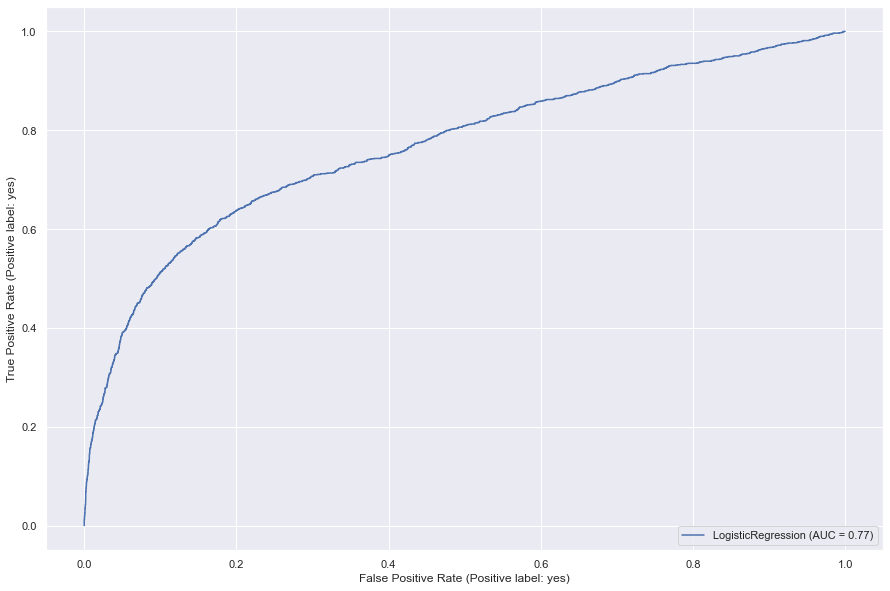

In [387]:
#ROC curve

metrics.plot_roc_curve(model_lr, test_X, test_y) 

Try undersampling